## Importing Libraries

In [127]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy

#Data cleaning/Pre-Processing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


#Modelling
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


#Model Evaluation
from sklearn import metrics
from scipy import stats as stat_
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.model_selection import cross_val_score, cross_validate


plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
## Applying 'SMOTE' to improve model performance
!pip install imblearn
!pip install imbalanced-learn

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Cleaning and Imputation/Pre-processing

1. The variable medical_specialty is important feature however it has too many distinct values. Hence we grouped them to reduce the number of categories.

In [4]:
high_frequency = ['InternalMedicine', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General', 'Orthopedics', 'Orthopedics-Reconstructive', 
                 'Emergency/Trauma', 'Urology','ObstetricsandGynecology','Psychiatry','Pulmonology ','Nephrology','Radiologist']

low_frequency = ['Surgery-PlasticwithinHeadandNeck','Psychiatry-Addictive','Proctology','Dermatology','SportsMedicine','Speech','Perinatology',\
                'Neurophysiology','Resident','Pediatrics-Hematology-Oncology','Pediatrics-EmergencyMedicine','Dentistry','DCPTEAM','Psychiatry-Child/Adolescent',\
                'Pediatrics-Pulmonology','Surgery-Pediatric','AllergyandImmunology','Pediatrics-Neurology','Anesthesiology','Pathology','Cardiology-Pediatric',\
                'Endocrinology-Metabolism','PhysicianNotFound','Surgery-Colon&Rectal','OutreachServices',\
                'Surgery-Maxillofacial','Rheumatology','Anesthesiology-Pediatric','Obstetrics','Obsterics&Gynecology-GynecologicOnco']

pediatrics = ['Pediatrics','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology','Pediatrics-Hematology-Oncology',\
               'Pediatrics-Neurology','Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Cardiology-Pediatric', 'Surgery-Pediatric']

psychic = ['Psychiatry-Addictive', 'Psychology', 'Psychiatry',  'Psychiatry-Child/Adolescent', 'PhysicalMedicineandRehabilitation', 'Osteopath']


neurology = ['Neurology', 'Surgery-Neuro',  'Pediatrics-Neurology', 'Neurophysiology']


surgery = ['Surgeon', 'Surgery-Cardiovascular', \
          'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial', \
             'Surgery-Plastic', 'Surgery-PlasticwithinHeadandNeck',  'Surgery-Thoracic',\
             'Surgery-Vascular', 'SurgicalSpecialty', 'Podiatry']
             
others = ['Endocrinology','Gastroenterology','Gynecology','Hematology','Hematology/Oncology','Hospitalist','InfectiousDiseases',\
           'Oncology','Ophthalmology','Otolaryngology','Pulmonology','Radiology']


missing = ['?']


In [5]:
df['medical_specialty'].nunique()

73

In [6]:
colMedical = []

for val in df['medical_specialty'] :
    if val in pediatrics :
        colMedical.append('pediatrics')
    elif val in psychic :
        colMedical.append('psychic')
    elif val in neurology :
        colMedical.append('neurology')
    elif val in surgery :
        colMedical.append('surgery')
    elif val in high_frequency :
        colMedical.append('high_freq')
    elif val in low_frequency :
        colMedical.append('low_freq')
    elif val in others :
        colMedical.append('others')
    elif val in missing :
        colMedical.append('missing')
    else:
        colMedical.append('?')
        
df['medical_specialty'] = colMedical

In [7]:
df['medical_specialty'].nunique()

9

In [ ]:
# the 'medical_speciality' column was brough down from 73 uniques values to just 9 sub-categories

In [8]:
# null
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [9]:
# we have no NaN, but there are '?' instead of NaN which we will replace and take appropriate steps

3. Handling Duplicate entries

In [10]:
#df.dropna(inplace = True)
print('Total length of the data = ', len(df))
print('Number of unique entries = ', len(np.unique(df['patient_nbr'])))
df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing duplicates:', len(df))

Total length of the data =  101766
Number of unique entries =  71518
Length after removing duplicates: 71518


4. Missing values in this dataset are represented by ‘?’. Find the number of missing values for each variable.

In [11]:
temp = pd.DataFrame(columns=['Column Name', 'Missing Values', 'Missing Percentage'])
for col in df.columns:
    l = len(df[df[col] == '?'])
    temp.loc[len(temp.index)] = [col, l, int((l / len(df))*100)]
temp

,Column Name,Missing Values,Missing Percentage
0,encounter_id,0,0
1,patient_nbr,0,0
2,race,1948,2
3,gender,0,0
4,age,0,0
5,weight,68665,96
6,admission_type_id,0,0
7,discharge_disposition_id,0,0
8,admission_source_id,0,0
9,time_in_hospital,0,0


Text(0.5, 1.0, 'Missing value')

<Figure size 1440x864 with 0 Axes>

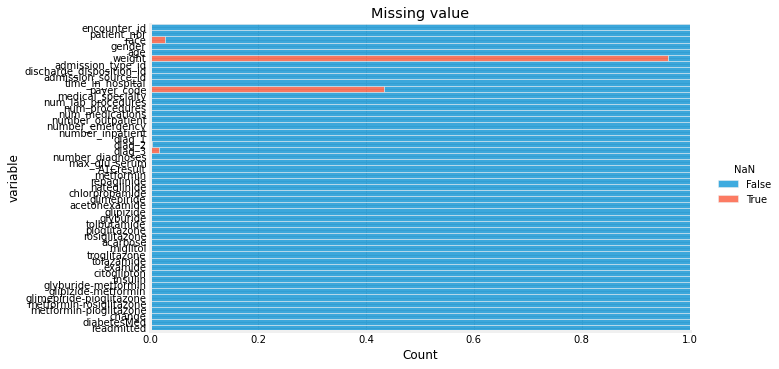

In [12]:
#plot missing values in the dataset
df = df.replace('?', np.nan)
plt.figure(figsize=(20,12))
sns.displot(data = df.isna().melt(value_name='NaN'), y="variable", hue="NaN", multiple="fill", aspect=2.0)
plt.title("Missing value")
# Note : medical_speciality is not diplayed here since for that column we'll consider missing values as a category

In [13]:
# Dropping Weight and Payer_code columns since they have more than 40% missing data
print('Dropping Weight and Payer_code columns since they have more than 40% missing data.')
df.drop(columns=['weight','payer_code'], inplace=True)

Dropping Weight and Payer_code columns since they have more than 40% missing data.


In [14]:
# Dropping columns 'encounter_id' and 'patient_nbr' since those are Zero variance features
print("Unique values in 'encounter_id':",df['encounter_id'].nunique())
print("Unique values in 'patient_nbr':",df['patient_nbr'].nunique())
print("Dropping columns 'encounter_id' and 'patient_nbr' since those are Zero variance features.")
df.drop(columns=['encounter_id','patient_nbr'], inplace=True)

Unique values in 'encounter_id': 71518
Unique values in 'patient_nbr': 71518
Dropping columns 'encounter_id' and 'patient_nbr' since those are Zero variance features.


In [15]:
# checking rows with misssing values
print("Rows with missing values (in percentage of total rows):", round(df.isna().sum().sum()/len(df)*100,2),"%")

Rows with missing values (in percentage of total rows): 4.86 %


In [16]:
# Since we'll only loose 4% of the data, we can proceed with dropping the missing values
print('Dropping rows with missing values.')
df.dropna(inplace=True)

Dropping rows with missing values.


In [17]:
# Checking missing values 
print("Rows with Missing values:", df.isna().sum().sum())

Rows with Missing values: 0


In [18]:
# All missing values has been dropped, the final dataframe looks like:
print("Final Dataframe shape:", df.shape)

Final Dataframe shape: (68358, 46)


Target label distribution

In [19]:
df['readmitted'].value_counts()

NO     40729
>30    21539
<30     6090
Name: readmitted, dtype: int64

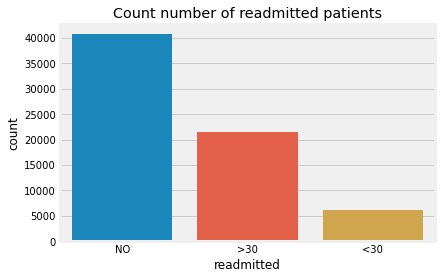

In [20]:
#Visualizing the target label distribution using a bar chart
s = sns.countplot(x = 'readmitted', data = df, order = df['readmitted'].value_counts(ascending = False).index)
plt.title('Count number of readmitted patients')
plt.show()

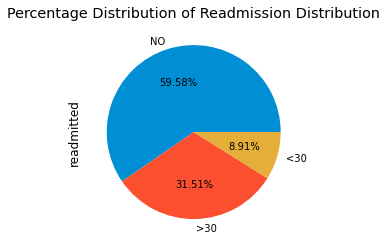

In [21]:
df.readmitted.value_counts().plot.pie(autopct = "%.2f%%")
plt.title("Percentage Distribution of Readmission Distribution")
plt.show()

Different variable Distributions

In [22]:
df.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

In [23]:
# Checking numeric variables
df.select_dtypes(np.number)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
1,1,1,7,3,59,0,18,0,0,0,9
2,1,1,7,2,11,5,13,2,0,1,6
3,1,1,7,2,44,1,16,0,0,0,7
4,1,1,7,1,51,0,8,0,0,0,5
5,2,1,2,3,31,6,16,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...
101754,1,1,7,9,50,2,33,0,0,0,9
101755,1,1,7,14,73,6,26,0,1,0,9
101756,1,1,7,2,46,6,17,1,1,1,9
101758,1,1,7,5,76,1,22,0,1,0,9


In [24]:
# converting 'admission_type_id', 'discharge_disposition_id' and 'admission_source_id' to categorical
to_conv = ['admission_type_id','discharge_disposition_id','admission_source_id']
for i in to_conv:
    df[i] = df[i].astype('object')

In [25]:
df.select_dtypes('object')

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,medical_specialty,diag_1,diag_2,diag_3,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,missing,276,250.01,255,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,missing,648,250,V27,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,missing,8,250.43,403,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,missing,197,157,250,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,missing,414,411,250,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,missing,574,574,250.02,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,Other,Female,[40-50),1,1,7,missing,592,599,518,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,Other,Female,[60-70),1,1,7,missing,996,585,403,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,Caucasian,Female,[80-90),1,1,7,missing,292,8,304,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [26]:
# Converting diag_1, diag_2 and diag_3 to numeric
df['diag_1'] = df['diag_1'].apply(lambda x: np.nan if (x[0]=='V' or x[0]=='E') else x)
df['diag_1'] = df['diag_1'].astype('float')
df['diag_2'] = df['diag_2'].apply(lambda x: np.nan if (x[0]=='V' or x[0]=='E') else x)
df['diag_2'] = df['diag_2'].astype('float')
df['diag_3'] = df['diag_3'].apply(lambda x: np.nan if (x[0]=='V' or x[0]=='E') else x)
df['diag_3'] = df['diag_3'].astype('float')

In [27]:
df[['diag_1','diag_2','diag_3']].isnull().sum()

diag_1     895
diag_2    1735
diag_3    3469
dtype: int64

In [28]:
print('% rows missing at most for diag_1, diag_2, diag_3 combines', df[['diag_1','diag_2','diag_3']].isnull().sum().sum()/len(df)*100)

% rows missing at most for diag_1, diag_2, diag_3 combines 8.922145176862987


In [29]:
# Since we have ~9% missing rows we can either drop these and proceed with EDA & Modelling or we can try imputation
# However, imputation may also introduce some bias we we'll try both methods and see which gives the best results

In [30]:
# Separating numeric and categorical variables
df_num = df.select_dtypes(np.number)
df_num

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
1,3,59,0,18,0,0,0,276.0,250.01,255.00,9
2,2,11,5,13,2,0,1,648.0,250.00,NaN,6
3,2,44,1,16,0,0,0,8.0,250.43,403.00,7
4,1,51,0,8,0,0,0,197.0,157.00,250.00,5
5,3,31,6,16,0,0,0,414.0,411.00,250.00,9
...,...,...,...,...,...,...,...,...,...,...,...
101754,9,50,2,33,0,0,0,574.0,574.00,250.02,9
101755,14,73,6,26,0,1,0,592.0,599.00,518.00,9
101756,2,46,6,17,1,1,1,996.0,585.00,403.00,9
101758,5,76,1,22,0,1,0,292.0,8.00,304.00,9


#### Knn Imputation for missing variables (within missing limit)

In [31]:
# Scaling numeric variables before imputation
sc = StandardScaler()
df_num_sc = pd.DataFrame(sc.fit_transform(df_num), columns=df_num.columns, index=df_num.index)
df_num_sc

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
1,-0.445592,0.792811,-0.819484,0.263786,-0.263815,-0.205365,-0.297871,-1.078272,-1.043575,-0.900741,0.876068
2,-0.783629,-1.606559,2.015793,-0.339336,1.580140,-0.205365,1.344081,0.741855,-1.043631,NaN,-0.715862
3,-0.783629,0.043008,-0.252428,0.022537,-0.263815,-0.205365,-0.297871,-2.389546,-1.041237,-0.065884,-0.185218
4,-1.121665,0.392916,-0.819484,-0.942457,-0.263815,-0.205365,-0.297871,-1.464804,-1.561424,-0.928945,-1.246505
5,-0.445592,-0.606822,2.582848,0.022537,-0.263815,-0.205365,-0.297871,-0.403063,-0.147237,-0.928945,0.876068
...,...,...,...,...,...,...,...,...,...,...,...
101754,1.582627,0.342929,0.314627,2.073151,-0.263815,-0.205365,-0.297871,0.379787,0.760292,-0.928832,0.876068
101755,3.272809,1.492628,2.582848,1.228781,-0.263815,1.732024,-0.297871,0.467858,0.899484,0.582822,0.876068
101756,-0.783629,0.142982,2.582848,0.143162,0.658163,1.732024,1.344081,2.444555,0.821537,-0.065884,0.876068
101758,0.230481,1.642588,-0.252428,0.746283,-0.263815,1.732024,-0.297871,-0.999987,-2.391006,-0.624335,0.876068


In [32]:
# knn imputation
imputer = KNNImputer(n_neighbors=5)
df_num_imp = pd.DataFrame(imputer.fit_transform(df_num_sc), columns=df_num.columns, index=df_num.index)
df_num_imp.isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
number_diagnoses      0
dtype: int64

In [33]:
df_cat = df.select_dtypes('object')
df_cat

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,medical_specialty,max_glu_serum,A1Cresult,metformin,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,missing,None,None,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,missing,None,None,No,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,missing,None,None,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,missing,None,None,No,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,missing,None,None,No,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,missing,None,>7,No,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,Other,Female,[40-50),1,1,7,missing,None,>8,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,Other,Female,[60-70),1,1,7,missing,None,None,No,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,Caucasian,Female,[80-90),1,1,7,missing,None,None,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [34]:
# So now we have 2 required dataframes:
# - df_num_imp : Scaled and Imputed dataframe with numeric variables
# - df_cat : dataframe with categorical variables

## Exploratory Data Analysis

### EDA for Numerical Variables

In [35]:
# Numeric variables
df_num_imp

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
1,-0.445592,0.792811,-0.819484,0.263786,-0.263815,-0.205365,-0.297871,-1.078272,-1.043575,-0.900741,0.876068
2,-0.783629,-1.606559,2.015793,-0.339336,1.580140,-0.205365,1.344081,0.741855,-1.043631,1.054403,-0.715862
3,-0.783629,0.043008,-0.252428,0.022537,-0.263815,-0.205365,-0.297871,-2.389546,-1.041237,-0.065884,-0.185218
4,-1.121665,0.392916,-0.819484,-0.942457,-0.263815,-0.205365,-0.297871,-1.464804,-1.561424,-0.928945,-1.246505
5,-0.445592,-0.606822,2.582848,0.022537,-0.263815,-0.205365,-0.297871,-0.403063,-0.147237,-0.928945,0.876068
...,...,...,...,...,...,...,...,...,...,...,...
101754,1.582627,0.342929,0.314627,2.073151,-0.263815,-0.205365,-0.297871,0.379787,0.760292,-0.928832,0.876068
101755,3.272809,1.492628,2.582848,1.228781,-0.263815,1.732024,-0.297871,0.467858,0.899484,0.582822,0.876068
101756,-0.783629,0.142982,2.582848,0.143162,0.658163,1.732024,1.344081,2.444555,0.821537,-0.065884,0.876068
101758,0.230481,1.642588,-0.252428,0.746283,-0.263815,1.732024,-0.297871,-0.999987,-2.391006,-0.624335,0.876068


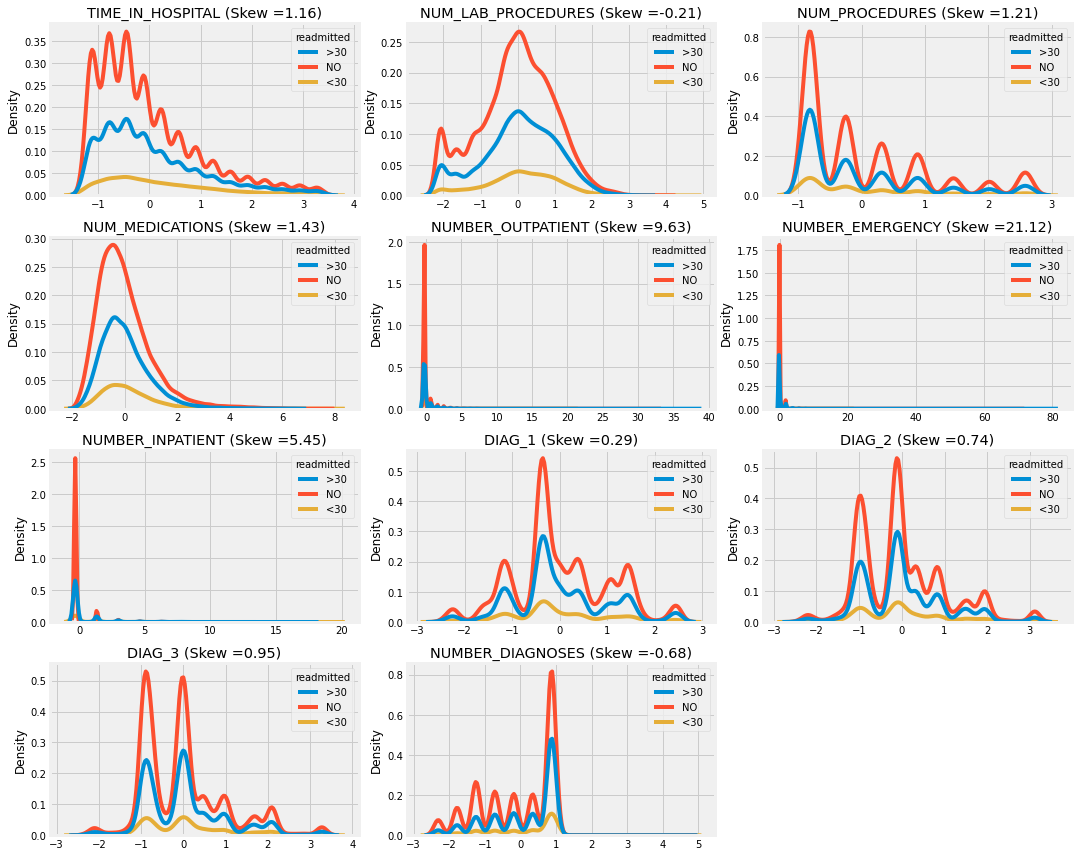

In [36]:
# Checking distribution of numerical variabes

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# loop through the length of columns and keep track of index
for n, col in enumerate(df_num_imp.columns):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n+1)

    # plot of numeric vs target
    sns.kdeplot(x=df_num_imp[col], hue=df_cat['readmitted'])
    
    # chart formatting
    ax.set_title(str(col.upper())+" (Skew ="+str(round(df_num_imp[col].skew(),2))+")")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [37]:
# We can observe that some of the distributions are heavily skewed, we can improve this by transformations

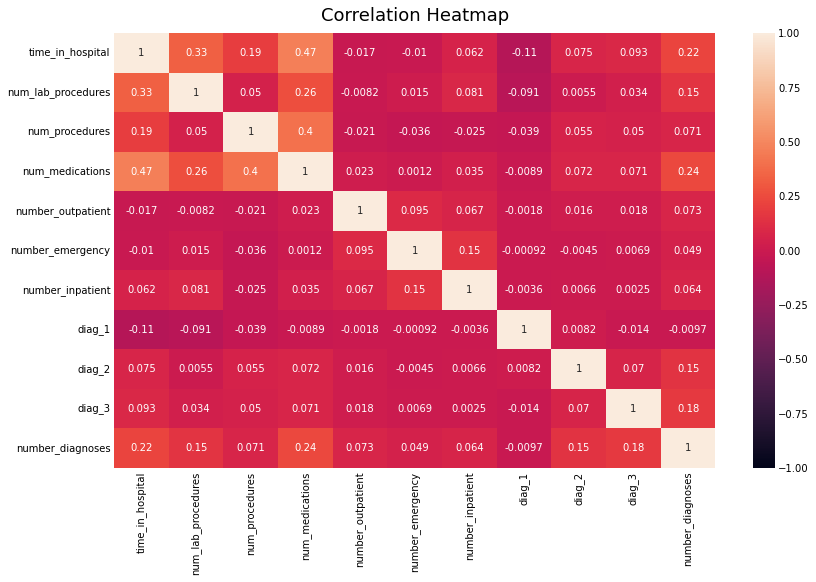

In [38]:
# Checking for multicollinearity in numeric variables
plt.figure(figsize=(12,8))
cmat = df_num_imp.corr()
sns.heatmap(cmat, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

In [39]:
# No visible multicollinearity, cheking VIF just to be sure
vif_data = pd.DataFrame()
vif_data["feature"] = df_num_imp.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_num_imp.values, i) for i in range(len(df_num_imp.columns))]
vif_data

,feature,VIF
0,time_in_hospital,1.399188
1,num_lab_procedures,1.162083
2,num_procedures,1.204304
3,num_medications,1.539338
4,number_outpatient,1.019639
5,number_emergency,1.032789
6,number_inpatient,1.036174
7,diag_1,1.020271
8,diag_2,1.028674
9,diag_3,1.038367


In [40]:
# VIF is less than 2.5 hence no multicollinearity

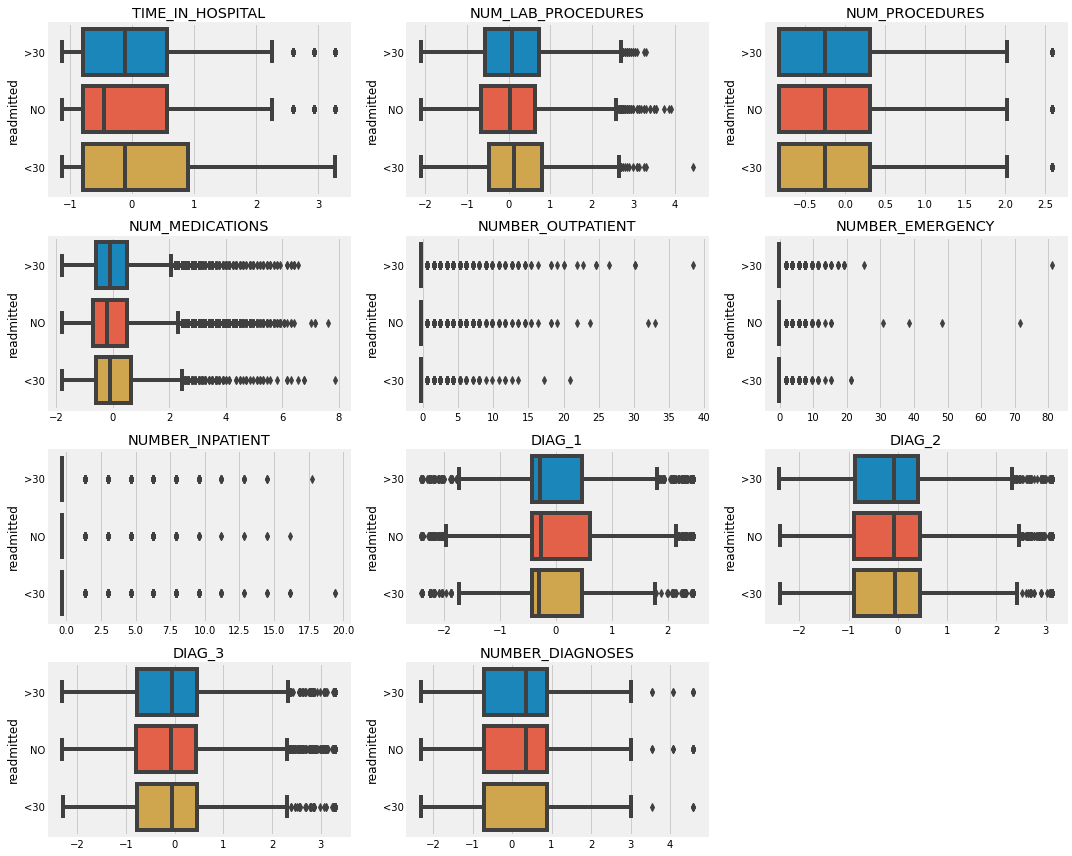

In [41]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# loop through the length of columns and keep track of index
for n, col in enumerate(df_num_imp.columns):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n+1)

    # plot of numeric vs target
    sns.boxplot(x=df_num_imp[col], y=df_cat['readmitted'])
    
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [42]:
# there doesn't seem much variation across the 3 target classes with respect to numerical variables, hence, we need to build 
# a model to identify impactful features

In [43]:
# To further refine the numeric distributions, we can try power transformer
# It'll not only improve the skew but also help with the outliers without altering the data 

In [44]:
# power transform the raw data
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_num_pt = pd.DataFrame(pt.fit_transform(df_num_imp), columns=df_num_imp.columns, index=df_num_imp.index)

# Checking skew after transformation
skew = pd.DataFrame(columns=['Variable','skew'])
for i in df_num_pt.columns:
    skew.loc[len(skew.index)] = [i, df_num_pt[i].skew()]
skew

,Variable,skew
0,time_in_hospital,0.124829
1,num_lab_procedures,0.022624
2,num_procedures,0.314673
3,num_medications,0.021948
4,number_outpatient,2.169709
5,number_emergency,3.241628
6,number_inpatient,2.334955
7,diag_1,-0.054513
8,diag_2,-0.032912
9,diag_3,-0.045324


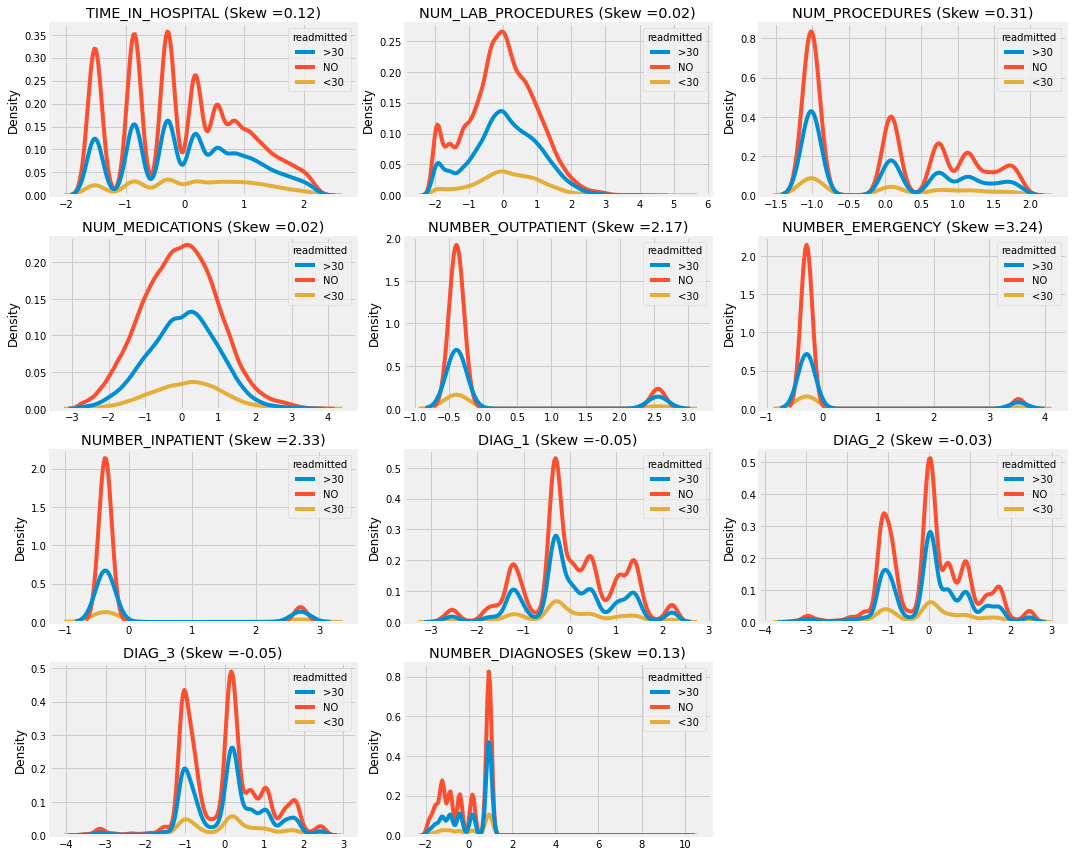

In [45]:
# Distribution of numerical variabes after transformation

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# loop through the length of columns and keep track of index
for n, col in enumerate(df_num_pt.columns):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n+1)

    # plot of numeric vs target
    sns.kdeplot(x=df_num_pt[col], hue=df_cat['readmitted'])
    
    # chart formatting
    ax.set_title(str(col.upper())+" (Skew ="+str(round(df_num_pt[col].skew(),2))+")")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

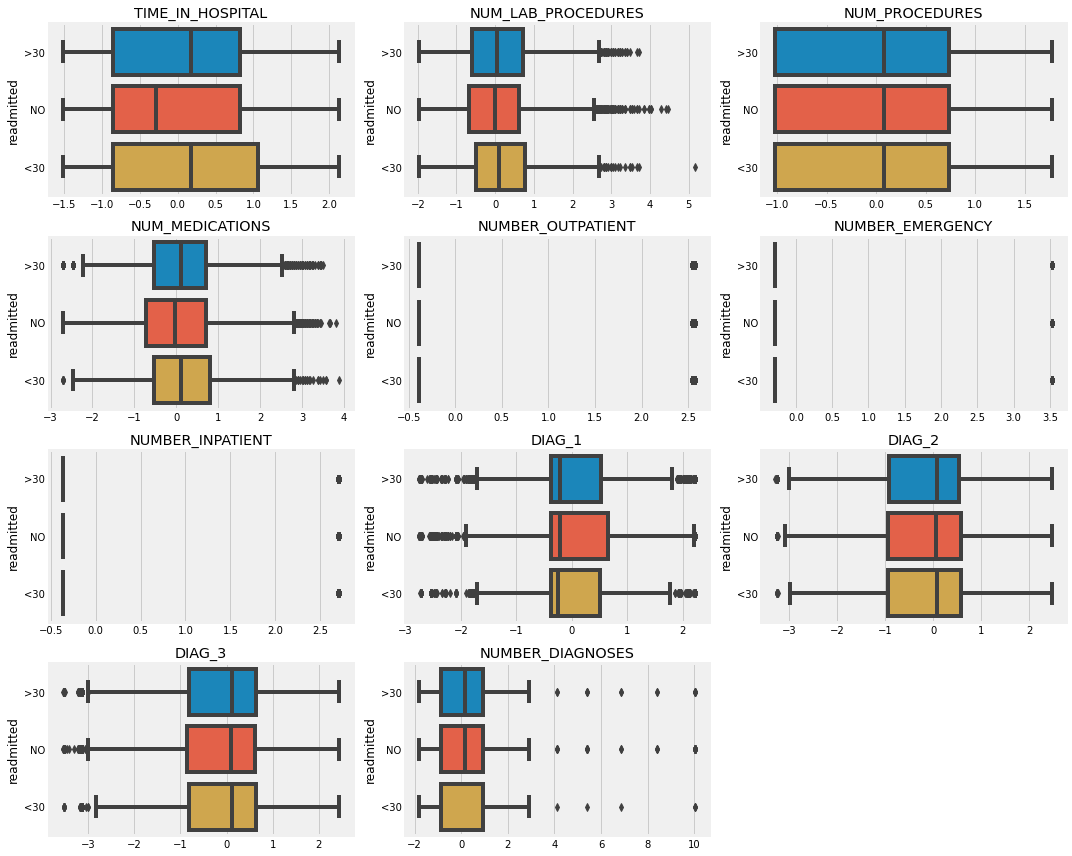

In [46]:
# Boxplots after Transformation

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# loop through the length of columns and keep track of index
for n, col in enumerate(df_num_pt.columns):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n+1)

    # plot of numeric vs target
    sns.boxplot(x=df_num_pt[col], y=df_cat['readmitted'])
    
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

### EDA Categorical Variables

Remapping the certain categorical data according to data dictionary

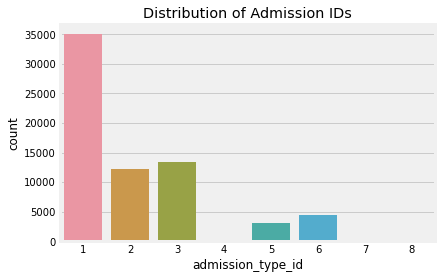

{'Emergency': 1, 'Urgent': 2, 'Elective': 3, 'Newborn': 4, 'Not Available': 5, 'NULL': 6, 'Trauma Center': 7, 'Not Mapped': 8}


In [47]:
# Adimission Type
sns.countplot(x = "admission_type_id", data = df_cat)
plt.title("Distribution of Admission IDs")
plt.show()
cat = {'Emergency' : 1, 'Urgent' : 2, 'Elective' : 3, 'Newborn' : 4, 'Not Available' : 5, 'NULL' : 6, 'Trauma Center' : 7, 'Not Mapped' : 8}
print(cat)

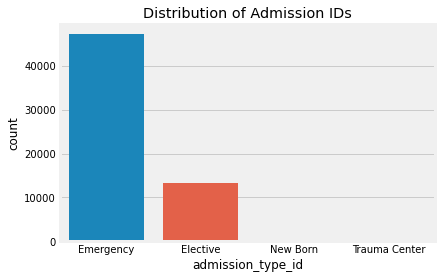

In [48]:
# Re-categoriezed Adimission Type

mapped = {1.0: "Emergency", 2.0: "Emergency", 3.0: "Elective", 4.0: "New Born",
          5.0: np.nan, 6.0: np.nan, 7.0: "Trauma Center", 8.0: np.nan}

df_cat['admission_type_id'] = df_cat.admission_type_id.replace(mapped)

sns.countplot(x = "admission_type_id", data = df_cat)
plt.title("Distribution of Admission IDs")
plt.show()

In [49]:
mapped_discharge = {1:"Discharged to Home", 6:"Discharged to Home", 8:"Discharged to Home", 13:"Discharged to Home",
                    19:"Discharged to Home", 18:np.nan, 25:np.nan, 26:np.nan, 2:"Other", 3:"Other", 4:"Other", 5:"Other", 7:"Other", 9:"Other",
                    10:"Other", 11:"Other", 12:"Other", 14:"Other", 15:"Other", 16:"Other", 17:"Other", 20:"Other", 21:"Other", 22:"Other", 23:"Other", 24:"Other",
                    27:"Other", 28:"Other", 29:"Other", 30:"Other"}

df_cat["discharge_disposition_id"] = df_cat["discharge_disposition_id"].replace(mapped_discharge)
df_cat['discharge_disposition_id'].unique()

array(['Discharged to Home', 'Other', nan], dtype=object)

In [50]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral", 4:"Other",
              5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan, 7:"Emergency"}
df_cat.admission_source_id = df_cat.admission_source_id.replace(mapped_adm)
df_cat['admission_source_id'].unique()

array(['Emergency', 'Referral', 'Other', nan], dtype=object)

In [51]:
# total number of categorical variables
len(df_cat.columns)

35

In [52]:
# Since there are 35 columns we'll be plotting 3 grids of plots with 12 subplots each

cat1=[] # will contain first 12 categorical column names
cat2=[] # will contain next 12
cat3=[] # will contain next 11
n = 1

for i in df_cat.columns:
    if (n<13):
        cat1.append(i)
    elif (n<25):
        cat2.append(i)
    else:
        cat3.append(i)
    n += 1

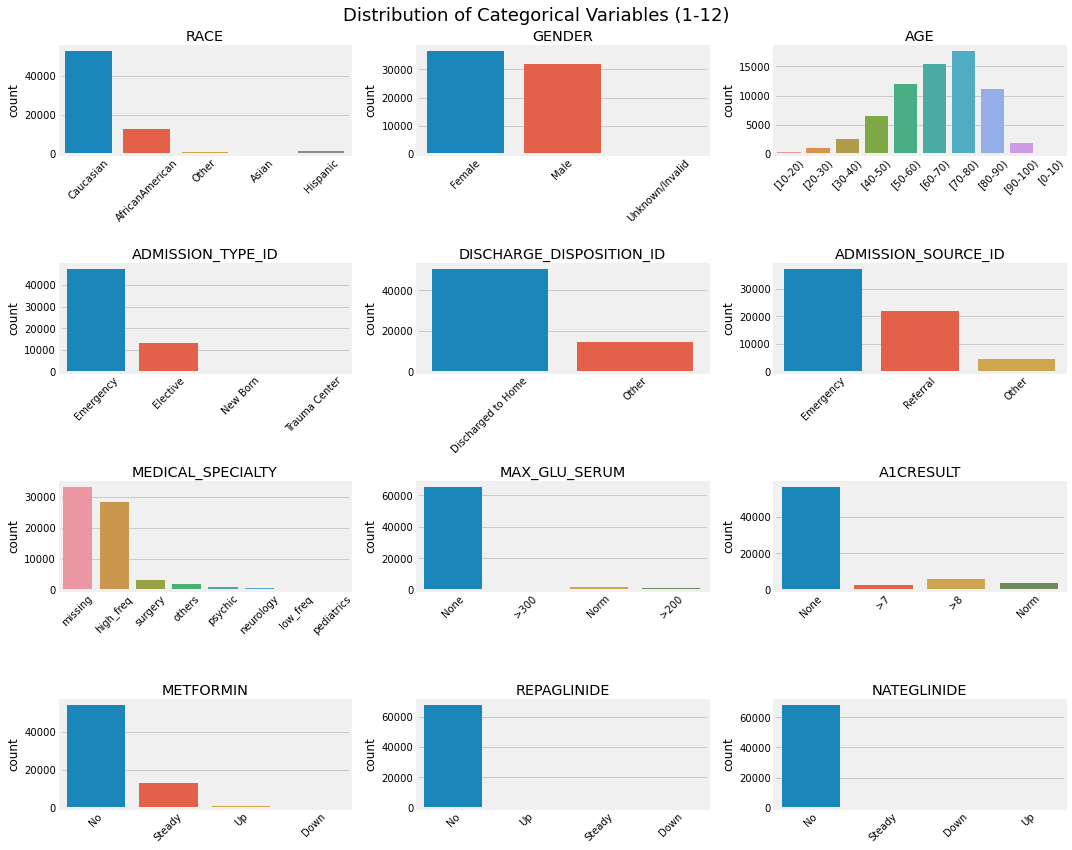

In [53]:
# Plotting distribution of Categorical variables

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of Categorical Variables (1-12)',fontsize=18, fontweight=20)

# loop through the length of columns and keep track of index
for n, col in enumerate(cat1):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n+1)

    # plot of numeric vs target
    sns.countplot(x=df_cat[col])
    
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

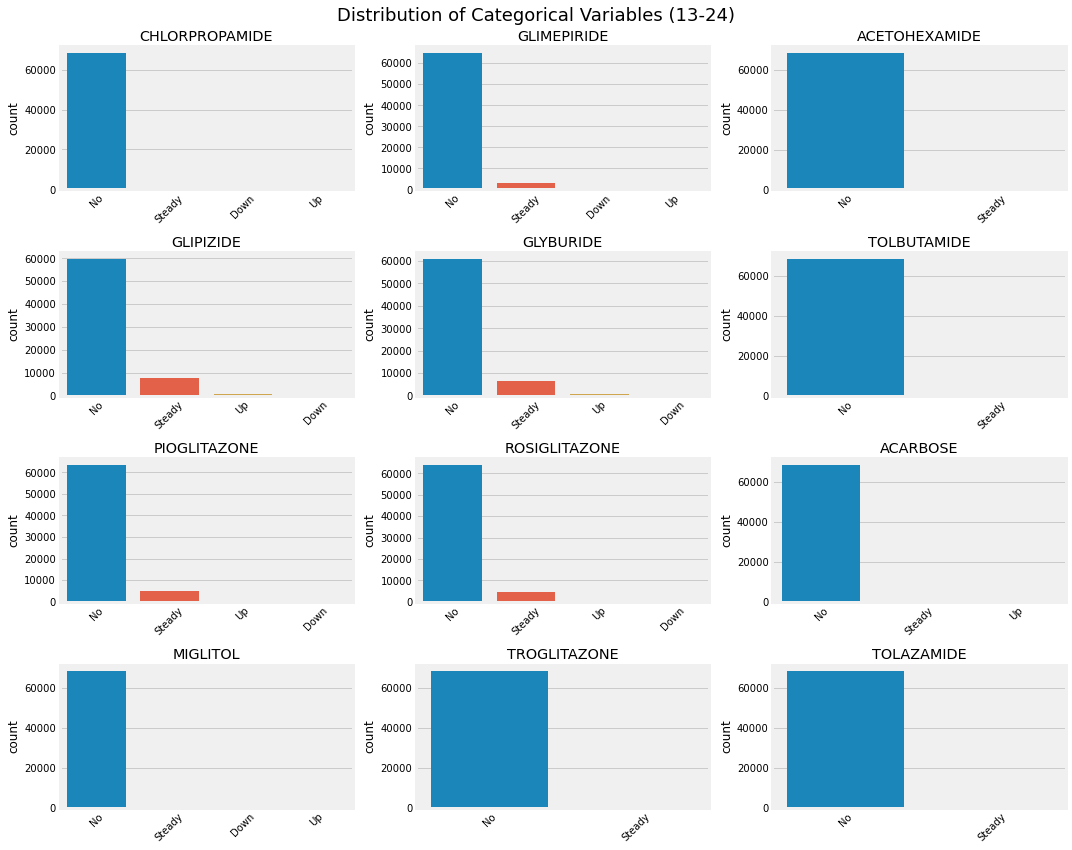

In [54]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of Categorical Variables (13-24)',fontsize=18, fontweight=20)

# loop through the length of columns and keep track of index
for n, col in enumerate(cat2):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n+1)

    # plot of numeric vs target
    sns.countplot(x=df_cat[col])
    
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

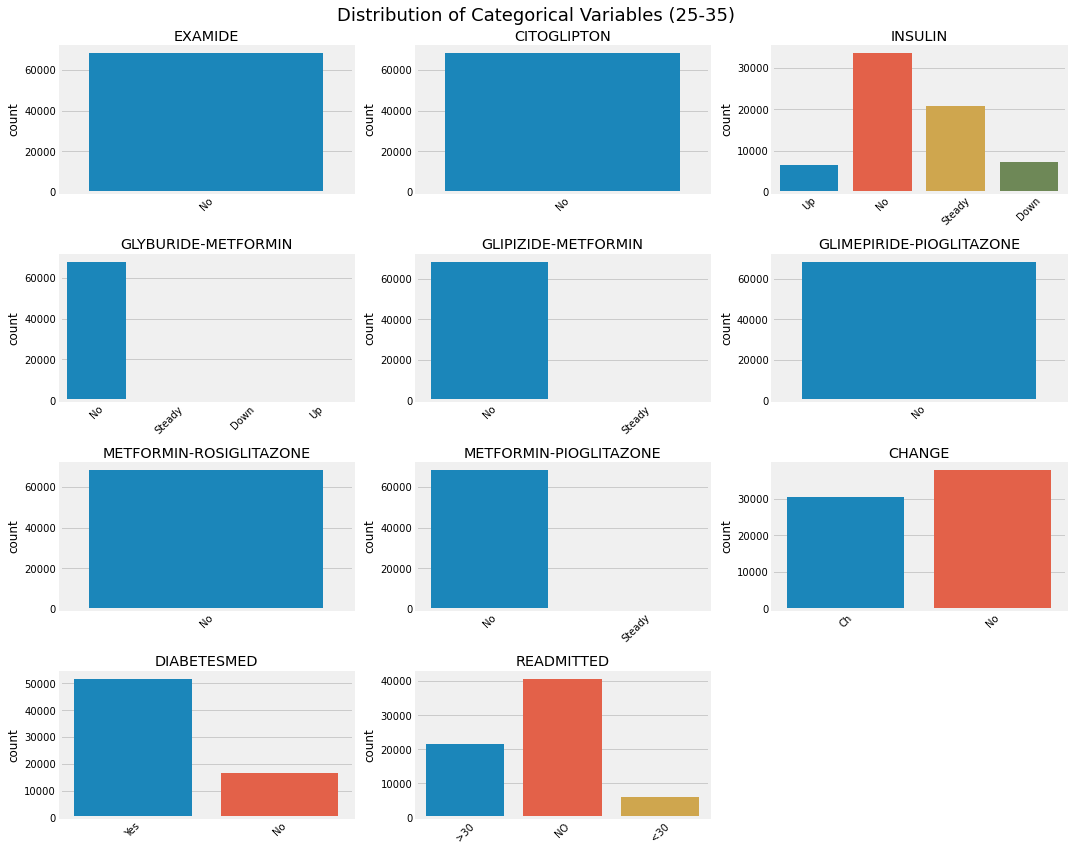

In [55]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of Categorical Variables (25-35)',fontsize=18, fontweight=20)

# loop through the length of columns and keep track of index
for n, col in enumerate(cat3):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n+1)

    # plot of numeric vs target
    sns.countplot(x=df_cat[col])
    
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [56]:
pd.crosstab(df_cat['age'],df_cat['readmitted'])

readmitted,<30,>30,NO
age,,,
[0-10),1,12,51
[10-20),20,98,222
[20-30),76,241,675
[30-40),178,656,1671
[40-50),482,1875,4141
[50-60),853,3636,7471
[60-70),1381,4822,9170
[70-80),1779,5973,9836
[80-90),1160,3761,6281


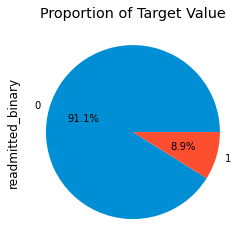

In [57]:
# Changing Target to binary : If readmitted within 30days then '1' else '0'

df_cat['readmitted_binary'] = df_cat['readmitted'].map({'NO': 0, '<30': 1, '>30': 0}) #re-admitted within 30 days
df_cat.readmitted_binary.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

In [58]:
ctab = pd.crosstab(df_cat['age'],df_cat['readmitted_binary'])
ctab

readmitted_binary,0,1
age,,
[0-10),63,1
[10-20),320,20
[20-30),916,76
[30-40),2327,178
[40-50),6016,482
[50-60),11107,853
[60-70),13992,1381
[70-80),15809,1779
[80-90),10042,1160


In [59]:
ctab = pd.crosstab(df_cat['age'],df_cat['readmitted_binary'], normalize='index')*100
ctab

readmitted_binary,0,1
age,,
[0-10),98.437500,1.562500
[10-20),94.117647,5.882353
[20-30),92.338710,7.661290
[30-40),92.894212,7.105788
[40-50),92.582333,7.417667
[50-60),92.867893,7.132107
[60-70),91.016718,8.983282
[70-80),89.885149,10.114851
[80-90),89.644706,10.355294


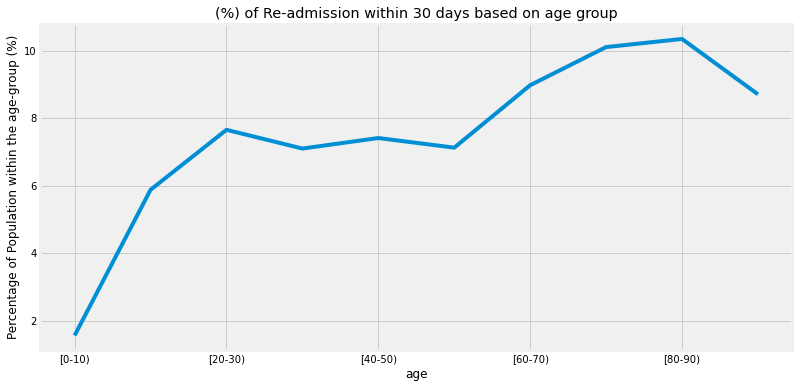

In [60]:
# Plotting Re-admission % for different age-groups
plt.figure(figsize=(12,6))
ctab[1].plot()
plt.title("(%) of Re-admission within 30 days based on age group")
plt.ylabel('Percentage of Population within the age-group (%)')
plt.show()

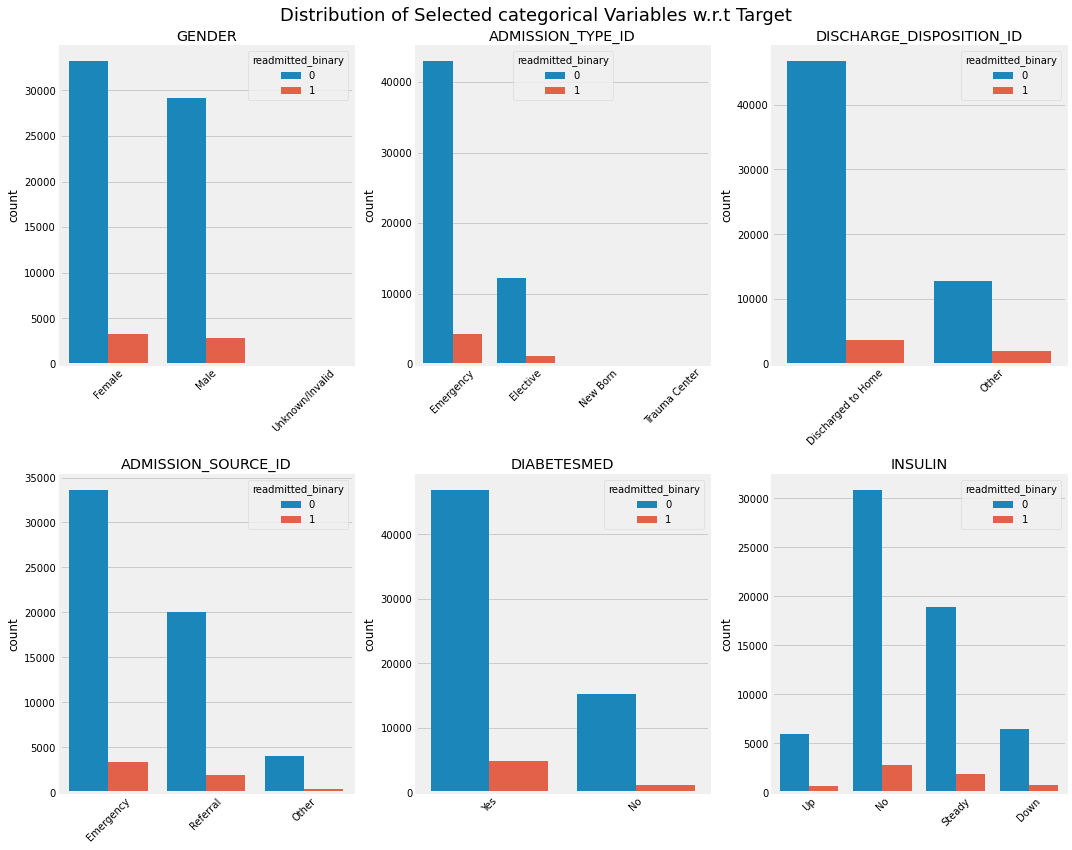

In [61]:
cols = ['gender','admission_type_id','discharge_disposition_id','admission_source_id','diabetesMed','insulin']

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of Selected categorical Variables w.r.t Target',fontsize=18, fontweight=20)

# loop through the length of columns and keep track of index
for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(2, 3, n+1)

    # plot of numeric vs target
    sns.countplot(x=df_cat[col], hue=df_cat['readmitted_binary'])
    
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [62]:
# Inferences:
# Female has a higher proportion of population, but the count of readmittance of Male seems be equal to that of female
# Similarly Discharge_disposition_id may also impact the re-admittance rate
# For other variables though not evidently visible, there might still be some relation with the target

In [63]:
for i in cols:
    print('Varibale:',i,'\n')
    print(pd.crosstab(df_cat[i],df_cat['readmitted_binary'], normalize='index')*100)
    print("-------------------------------------------------------\n")

Varibale: gender 

readmitted_binary           0         1
gender                                 
Female              91.023600  8.976400
Male                91.167716  8.832284
Unknown/Invalid    100.000000  0.000000
-------------------------------------------------------

Varibale: admission_type_id 

readmitted_binary           0          1
admission_type_id                       
Elective            91.662918   8.337082
Emergency           90.985152   9.014848
New Born            88.888889  11.111111
Trauma Center      100.000000   0.000000
-------------------------------------------------------

Varibale: discharge_disposition_id 

readmitted_binary                 0          1
discharge_disposition_id                      
Discharged to Home        92.540215   7.459785
Other                     86.233011  13.766989
-------------------------------------------------------

Varibale: admission_source_id 

readmitted_binary            0         1
admission_source_id                 

In [64]:
### to reduce col count after encoding we can combine categroies which has similar % of readmittance !!

In [65]:
# Inferences:
# Gender has no impact on re-admittance rate
# discharge_disposition has the highest impact
# The other have a very slight impact on readmittance rate

### Encoding & Train - Test Split

In [66]:
df_num_pt.shape # Scaled and Power Transformed

(68358, 11)

In [67]:
df_cat.shape # Readmitted & Readmitted_binary hence 1 extra column

(68358, 36)

In [68]:
df_cat

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,medical_specialty,max_glu_serum,A1Cresult,metformin,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
1,Caucasian,Female,[10-20),Emergency,Discharged to Home,Emergency,missing,None,None,No,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to Home,Emergency,missing,None,None,No,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),Emergency,Discharged to Home,Emergency,missing,None,None,No,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),Emergency,Discharged to Home,Emergency,missing,None,None,No,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
5,Caucasian,Male,[50-60),Emergency,Discharged to Home,Referral,missing,None,None,No,...,Steady,No,No,No,No,No,No,Yes,>30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),Emergency,Discharged to Home,Emergency,missing,None,>7,No,...,Steady,No,No,No,No,No,Ch,Yes,>30,0
101755,Other,Female,[40-50),Emergency,Discharged to Home,Emergency,missing,None,>8,No,...,Up,No,No,No,No,No,Ch,Yes,>30,0
101756,Other,Female,[60-70),Emergency,Discharged to Home,Emergency,missing,None,None,No,...,Steady,No,No,No,No,No,No,Yes,>30,0
101758,Caucasian,Female,[80-90),Emergency,Discharged to Home,Emergency,missing,None,None,No,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [69]:
df_cat_enc = pd.get_dummies(df_cat.drop(columns=['readmitted']), drop_first=True)
df_cat_enc

,readmitted_binary,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),...,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,1
3,0,0,1,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
5,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
101755,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
101756,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
101758,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [70]:
df_cat_enc['readmitted_binary'].value_counts()

0    62268
1     6090
Name: readmitted_binary, dtype: int64

In [71]:
df_final = pd.concat([df_num_pt,df_cat_enc],axis=1)
print("Shape of Final Dataframe:", df_final.shape)
df_final

Shape of Final Dataframe: (68358, 92)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
1,-0.291886,0.782792,-1.016435,0.489262,-0.390600,-0.283670,-0.369736,-1.114593,-1.149007,-1.001435,...,0,0,1,1,0,0,0,0,0,1
2,-0.856927,-1.540515,1.607281,-0.192788,2.575451,-0.283670,2.702722,0.775035,-1.149085,1.112344,...,1,0,0,1,0,0,0,0,1,1
3,-0.856927,-0.008121,0.082963,0.244787,-0.390600,-0.283670,-0.369736,-2.724181,-1.145730,0.114383,...,0,0,1,1,0,0,0,0,0,1
4,-1.519601,0.353270,-1.016435,-1.103596,-0.390600,-0.283670,-0.369736,-1.572916,-1.910545,-1.044846,...,0,1,0,1,0,0,0,0,0,1
5,-0.291886,-0.638532,1.773201,0.244787,-0.390600,-0.283670,-0.369736,-0.354894,-0.017281,-1.044846,...,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,1.445541,0.300741,0.737439,1.744963,-0.390600,-0.283670,-0.369736,0.438976,0.844384,-1.044672,...,0,1,0,1,0,0,0,0,0,1
101755,2.130040,1.567443,1.773201,1.243959,-0.390600,3.525205,-0.369736,0.522150,0.958256,0.741328,...,0,0,1,1,0,0,0,0,0,1
101756,-0.856927,0.093558,1.773201,0.371156,2.544766,3.525205,2.702722,2.212598,0.894925,0.114383,...,0,1,0,1,0,0,0,0,1,1
101758,0.533903,1.740163,0.082963,0.900432,-0.390600,3.525205,-0.369736,-1.023676,-3.264887,-0.594717,...,0,0,1,1,0,0,0,0,0,1


## Supervised Learning

### Train-Test Split

In [72]:
print(list(df_final.columns))

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'readmitted_binary', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Male', 'gender_Unknown/Invalid', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'admission_type_id_Emergency', 'admission_type_id_New Born', 'admission_type_id_Trauma Center', 'discharge_disposition_id_Other', 'admission_source_id_Other', 'admission_source_id_Referral', 'medical_specialty_low_freq', 'medical_specialty_missing', 'medical_specialty_neurology', 'medical_specialty_others', 'medical_specialty_pediatrics', 'medical_specialty_psychic', 'medical_specialty_surgery', 'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'metformin_No', 'metformin_Stea

In [185]:
X = df_final.drop(['readmitted_binary'],axis=1)  # independant features
Y = df_final['readmitted_binary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=10, shuffle=True)

In [157]:
print("Train dimensions:", X_train.shape," and Test dimensions:", X_test.shape)

Train dimensions: (47850, 91)  and Test dimensions: (20508, 91)


### Naive Bayes as Baseline model

Gaussian Naive Bayes Performance:
Train Acurracy: 0.10881922675026123
Training error is: 0.8911807732497388
Test Acurracy: 0.10678759508484494
Test error is: 0.8932124049151551

               precision    recall  f1-score   support

           0       0.93      0.02      0.04     18703
           1       0.09      0.98      0.16      1805

    accuracy                           0.11     20508
   macro avg       0.51      0.50      0.10     20508
weighted avg       0.85      0.11      0.05     20508

Confusion Matrix (Training Data):


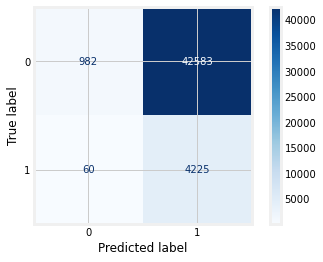

Confusion Matrix (Test Data):


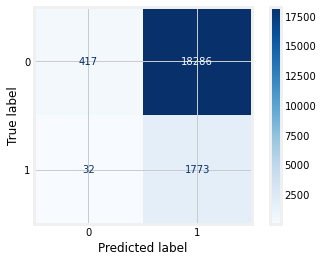

In [158]:
#fitting the model
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
nb_pred_test = gnb.predict(X_test)
nb_pred_train = gnb.predict(X_train)
train_acc = accuracy_score(Y_train, nb_pred_train)
test_acc = accuracy_score(Y_test, nb_pred_test)
test_err = 1-test_acc
train_err = 1 - train_acc
#Results
print('Gaussian Naive Bayes Performance:')
print('Train Acurracy:', train_acc)
print('Training error is:', train_err)
#confusion matrix for training data
c_xtrain = plot_confusion_matrix(gnb, X_train, Y_train ,display_labels = None, cmap=plt.cm.Blues)
print('Test Acurracy:', test_acc)
print("Test error is:",test_err)
print("\n",classification_report(Y_test, nb_pred_test))
print("Confusion Matrix (Training Data):")
plt.show()
#confusion_matrix for the test data
print("Confusion Matrix (Test Data):")
c_xtest = plot_confusion_matrix(gnb, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


In [159]:
#We can observe that the predictions are pretty skewed w.r.t to the target class, this is due to the imbalance present
#in our data, to treat this imbalance we'll proceed with over/under sampling

### Oversampling Train Data

In [160]:
## Applying SMOTE to balance the target class

In [187]:
## Adaptive SMOTE

#Note: Oversampling is only done for train data and not for test data

adasyn = ADASYN(random_state = 10)
X_train, Y_train = adasyn.fit_resample(X_train, Y_train)

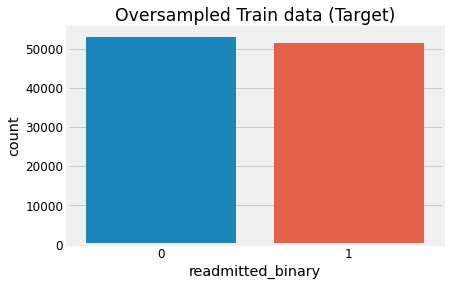

In [188]:
sns.countplot(Y_train)
plt.title("Oversampled Train data (Target)")
plt.show()

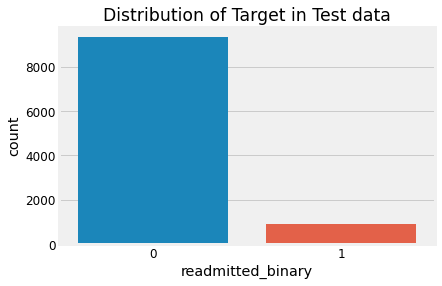

In [189]:
sns.countplot(Y_test)
plt.title("Distribution of Target in Test data")
plt.show()

Gaussian Naive Bayes Performance:
Train Acurracy: 0.5327671024658772
Training error is: 0.4672328975341228
Test Acurracy: 0.527032532153873
Test error is: 0.472967467846127
              precision    recall  f1-score   support

           0       0.86      0.16      0.27      9373
           1       0.49      0.97      0.65      7810

    accuracy                           0.53     17183
   macro avg       0.67      0.56      0.46     17183
weighted avg       0.69      0.53      0.44     17183

Confusion Matrix (Training Data):


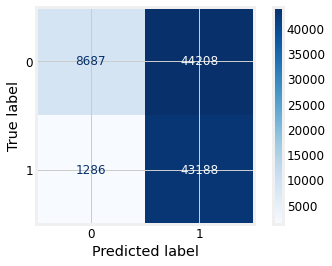

Confusion Matrix (Test Data):


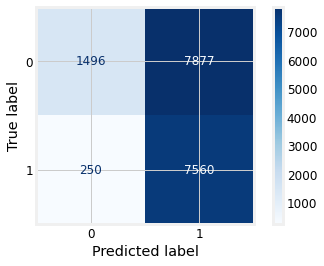

In [191]:
#fitting the model
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
nb_pred_test = gnb.predict(X_test)
nb_pred_train = gnb.predict(X_train)
train_acc = accuracy_score(Y_train, nb_pred_train)
test_acc = accuracy_score(Y_test, nb_pred_test)
test_err = 1-test_acc
train_err = 1 - train_acc
#Results
print('Gaussian Naive Bayes Performance:')
print('Train Acurracy:', train_acc)
print('Training error is:', train_err)
#confusion matrix for training data
c_xtrain=plot_confusion_matrix(gnb, X_train, Y_train ,display_labels = None, cmap=plt.cm.Blues)
print('Test Acurracy:', test_acc)
print("Test error is:",test_err)
print(classification_report(Y_test, nb_pred_test))
print("Confusion Matrix (Training Data):")
plt.show()
#confusion_matrix for the test data
print("Confusion Matrix (Test Data):")
c_xtest = plot_confusion_matrix(gnb, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


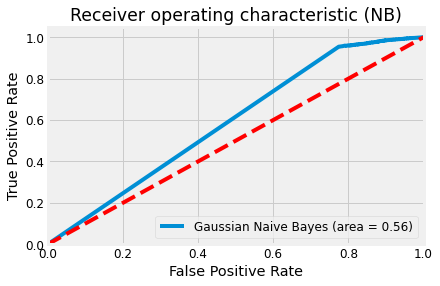

In [192]:
nb_roc_auc = roc_auc_score(Y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (NB)')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

In [183]:
#Defining the grid search parameters
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=20)}
gnb = GaussianNB()

#using gridsearchcv with cross validation=5
gnb_1 = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, cv = 5, scoring = 'f1', refit = True, verbose = 3)
# Fitting the model
gnb_1.fit(X_train, Y_train)
#printing the best parameters
print("The best parameters are: ",gnb_1.best_params_)

#Finding the best estimator
best_gnb_estimator = gnb_1.best_estimator_

#Finding f1-score of the best model
best_gnb = best_gnb_estimator.fit(X_train,Y_train)
best_gnb_pred = best_gnb.predict(X_test)
best_gnb_f1 = metrics.f1_score(Y_test,best_gnb_pred)

print("\nBest estimator: ",best_gnb_estimator)
print('\nF1-Score of the model, after hyperparameter tuning:  %.4f' % (metrics.f1_score(Y_test,best_gnb_pred)*100))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.596 total time=   0.1s
[CV 2/5] END .................var_smoothing=1.0;, score=0.602 total time=   0.1s
[CV 3/5] END .................var_smoothing=1.0;, score=0.574 total time=   0.1s
[CV 4/5] END .................var_smoothing=1.0;, score=0.582 total time=   0.1s
[CV 5/5] END .................var_smoothing=1.0;, score=0.600 total time=   0.1s
[CV 1/5] END ..var_smoothing=0.3359818286283782;, score=0.644 total time=   0.1s
[CV 2/5] END ..var_smoothing=0.3359818286283782;, score=0.647 total time=   0.1s
[CV 3/5] END ..var_smoothing=0.3359818286283782;, score=0.644 total time=   0.1s
[CV 4/5] END ..var_smoothing=0.3359818286283782;, score=0.644 total time=   0.1s
[CV 5/5] END ..var_smoothing=0.3359818286283782;, score=0.644 total time=   0.1s
[CV 1/5] END .var_smoothing=0.11288378916846892;, score=0.644 total time=   0.1s
[CV 2/5] END .var_smoothing=0.11288378916846892


Best estimator:  GaussianNB(var_smoothing=0.012742749857031341)

F1-Score of the model, after hyperparameter tuning:  67.3638


              precision    recall  f1-score   support

           0       0.86      0.46      0.60     12469
           1       0.54      0.89      0.67      8823

    accuracy                           0.64     21292
   macro avg       0.70      0.68      0.64     21292
weighted avg       0.73      0.64      0.63     21292



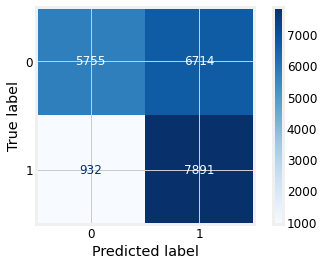

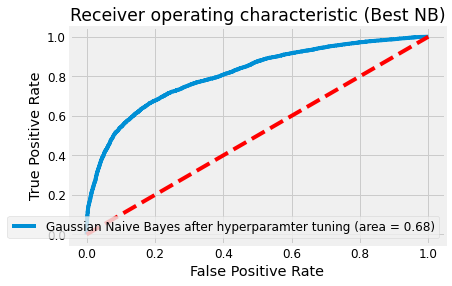

In [184]:
#Model assesment metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#Calculating precision, Recall and, F1-Score
y_pred_1 = best_gnb_estimator.predict(X_test)
print(classification_report(Y_test, y_pred_1))
#confusion_matrix for the testing
disp = plot_confusion_matrix(best_gnb_estimator, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)
#plotting the ROC curve

nb_roc_auc1 = roc_auc_score(Y_test, best_gnb_estimator.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, best_gnb_estimator.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes after hyperparamter tuning (area = %0.2f)' % nb_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Best NB)')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

In [169]:
print("Accuracy Score for NB:", accuracy_score(Y_test, y_pred_1))
print("ROC AUC Score for NB:", roc_auc_score(Y_test, y_pred_1))

Accuracy Score for NB: 0.6402717765670988
ROC AUC Score for NB: 0.6784662663026995


### Logistic Regression 

In [170]:
lr_model = LogisticRegression(random_state=0)
# fit the model
lr_model.fit(X_train, Y_train)
lr_pred_test = lr_model.predict(X_test)
lr_pred_train = lr_model.predict(X_train)
lr_train_acc = accuracy_score(Y_train, lr_pred_train)
lr_test_acc = accuracy_score(Y_test, lr_pred_test)
lr_test_err = 1 - lr_test_acc
lr_train_err = 1 - lr_train_acc

Text(0, 0.5, 'Frequency')

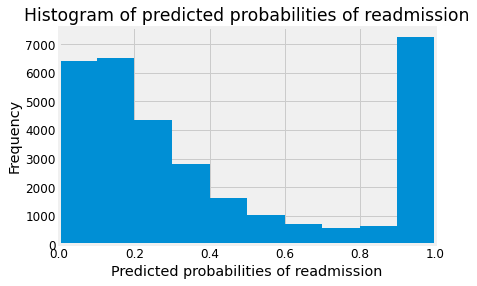

In [171]:
lr_model.predict_proba(X_test)[0:10, 1]
y_pred1 = lr_model.predict_proba(X_test)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of readmission')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of readmission')
plt.ylabel('Frequency')

Logistic Regression Performance:
Training accuracy is: 0.8503126593489171
Training error is: 0.1496873406510829
Training accuracy is: 0.8516187613501158
Test error is: 0.14838123864988417
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     18750
           1       0.91      0.71      0.80     13188

    accuracy                           0.85     31938
   macro avg       0.87      0.83      0.84     31938
weighted avg       0.86      0.85      0.85     31938

Confusion Matrix for training data:


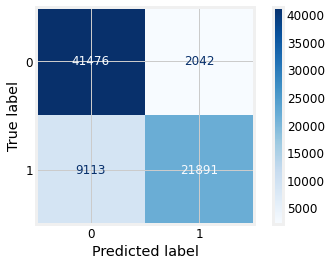

Confusion Matrix for test data:


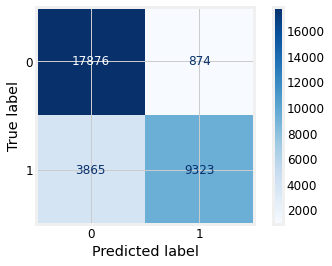

In [172]:
print('Logistic Regression Performance:')
print('Training accuracy is:', lr_train_acc)
print('Training error is:', lr_train_err)
#confusion_matrix for the training data
c_XtrainLogistic = plot_confusion_matrix(lr_model, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)
print('Training accuracy is:', lr_test_acc)
print('Test error is:',lr_test_err)
print(classification_report(Y_test, lr_pred_test))
print("Confusion Matrix for training data:")
plt.show()
#confusion_matrix for the test data
print("Confusion Matrix for test data:")
c_XtestLogistic = plot_confusion_matrix(lr_model, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

ROC AUC Score before hyperparameter tuning: 0.8301586047922354


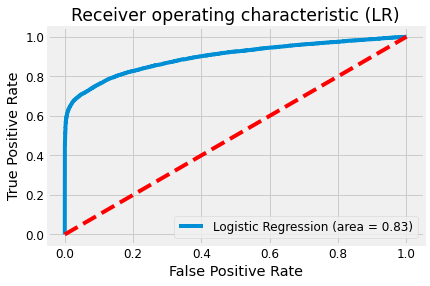

In [173]:
lr_roc_auc = roc_auc_score(Y_test, lr_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lr_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (LR)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print("ROC AUC Score before hyperparameter tuning:", roc_auc_score(Y_test, lr_pred_test))
plt.show()

In [174]:
import time
start_time = time.time()
param_grid = {'solver':['newton-cg', 'lbfgs'],
              'C': [1,5,50],
              'penalty':['l1', 'l2', 'elasticnet']}
LogReg = LogisticRegression()

#using gridsearchcv with cross validation=5
LogReg_1 = GridSearchCV(LogReg, param_grid, cv = 5, scoring = 'f1', refit = True, verbose = 3)
# Fitting the model
LogReg_1.fit(X_train, Y_train)
#Finding the best estimator
print('\nThe best parameters: ', LogReg_1.best_params_)

#best estimator
bestlogistic_estimator = LogReg_1.best_estimator_

#Finding the f1 of best model
best_logistic_model = bestlogistic_estimator.fit(X_train,Y_train)
best_logistic_ypred = best_logistic_model.predict(X_test)
best_logistic_roc = metrics.roc_auc_score(Y_test,best_logistic_ypred)
print('\nROC AUC of the model after hyperparameter tuning & Regularization is:  %.4f' % (best_logistic_roc*100))
end_time = time.time()
total_time_before = end_time-start_time
print("\nExcecution time: ",total_time_before)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.799 total time=   3.8s
[CV 2/5] END .C=1, penalty=l2, solver=newton-cg;

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     18750
           1       0.92      0.71      0.80     13188

    accuracy                           0.85     31938
   macro avg       0.87      0.83      0.84     31938
weighted avg       0.86      0.85      0.85     31938

ROC AUC Score after tuning Hyperparameters/Regularization: 0.8304152987564453


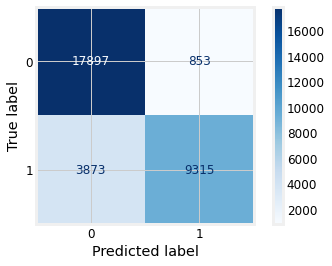

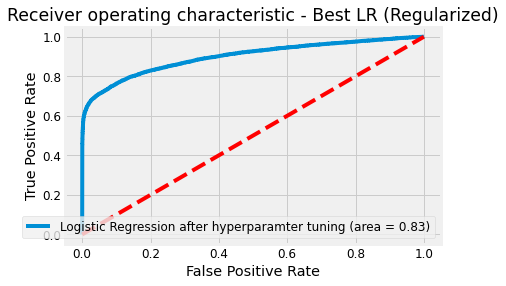

In [175]:
#Model assesment metrics for Logistic Regression
#Calculating precision, Recall and, F1-Score
y_pred_log = bestlogistic_estimator.predict(X_test)
print(classification_report(Y_test, y_pred_log))
#confusion_matrix for the testing
disp = plot_confusion_matrix(bestlogistic_estimator, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)
#plotting the ROC curve

nb_roc_auc_log = roc_auc_score(Y_test, bestlogistic_estimator.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, bestlogistic_estimator.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression after hyperparamter tuning (area = %0.2f)' % nb_roc_auc_log)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Best LR (Regularized)')
plt.legend(loc="lower right")
plt.savefig('NB_ROC_logistic')
print("ROC AUC Score after tuning Hyperparameters/Regularization:", roc_auc_score(Y_test,y_pred_log))
plt.show()

In [193]:
#Getting coeffiecients for the selected model
bestlogistic_estimator.coef_

array([[ 1.23630422e-01, -7.15394278e-02,  1.21880416e-02,
         2.11779042e-02, -5.56502912e-02, -7.50267182e-02,
         1.23035680e-01, -5.85030477e-02, -4.15319331e-02,
         4.20538417e-03,  7.67720502e-02, -1.64893315e+00,
        -3.83698437e-01, -1.43918372e+00, -1.39134310e+00,
        -4.14072123e-01, -1.68708730e-01, -6.44685665e+00,
        -7.16906673e+00, -7.03491220e+00, -6.84482948e+00,
        -6.65654463e+00, -6.17626127e+00, -6.03099998e+00,
        -6.24703469e+00, -7.06488055e+00, -5.94735697e-01,
        -3.47034923e+00, -2.60334469e+00,  3.51602331e-02,
        -1.12550967e+00, -7.31655719e-01, -1.02978598e+00,
        -4.12453327e-01, -1.32198659e+00, -8.98065727e-01,
        -5.05292551e+00, -8.34730619e-01, -1.03587722e+00,
        -1.86738282e+00, -5.55316054e-01, -1.79163893e+00,
        -1.91913233e+00, -1.09122254e+00, -1.84524001e+00,
        -2.69624057e+00, -2.65013378e+00, -3.32199992e+00,
        -3.34425617e+00, -3.61944296e+00, -2.52055820e+0

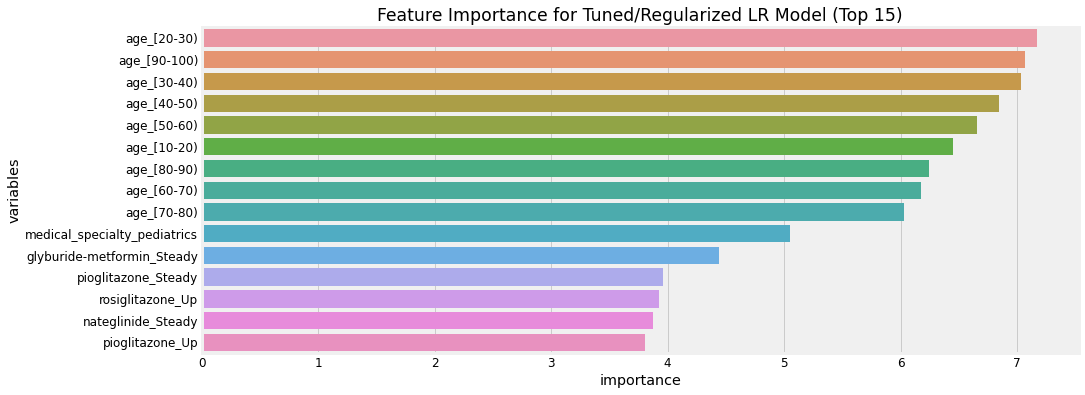

In [194]:
#Getting feature Importance for LR model

imp_lr = pd.DataFrame({'variables':X_train.columns, 'importance':abs(bestlogistic_estimator.coef_[0])})
imp_lr = imp_lr.sort_values(by='importance',ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(y=imp_lr.head(15).variables, x=imp_lr.head(15).importance)
plt.title("Feature Importance for Tuned/Regularized LR Model (Top 15)")
plt.show()

### Feature Selection

In [195]:
from sklearn.feature_selection import RFE,SequentialFeatureSelector

In [196]:
bestlogistic_estimator.coef_

array([[ 1.23630422e-01, -7.15394278e-02,  1.21880416e-02,
         2.11779042e-02, -5.56502912e-02, -7.50267182e-02,
         1.23035680e-01, -5.85030477e-02, -4.15319331e-02,
         4.20538417e-03,  7.67720502e-02, -1.64893315e+00,
        -3.83698437e-01, -1.43918372e+00, -1.39134310e+00,
        -4.14072123e-01, -1.68708730e-01, -6.44685665e+00,
        -7.16906673e+00, -7.03491220e+00, -6.84482948e+00,
        -6.65654463e+00, -6.17626127e+00, -6.03099998e+00,
        -6.24703469e+00, -7.06488055e+00, -5.94735697e-01,
        -3.47034923e+00, -2.60334469e+00,  3.51602331e-02,
        -1.12550967e+00, -7.31655719e-01, -1.02978598e+00,
        -4.12453327e-01, -1.32198659e+00, -8.98065727e-01,
        -5.05292551e+00, -8.34730619e-01, -1.03587722e+00,
        -1.86738282e+00, -5.55316054e-01, -1.79163893e+00,
        -1.91913233e+00, -1.09122254e+00, -1.84524001e+00,
        -2.69624057e+00, -2.65013378e+00, -3.32199992e+00,
        -3.34425617e+00, -3.61944296e+00, -2.52055820e+0

Feature 0 Score: 0.12363042173429631
Feature 1 Score: -0.07153942778504498
Feature 2 Score: 0.012188041625246471
Feature 3 Score: 0.021177904170840697
Feature 4 Score: -0.05565029121967068
Feature 5 Score: -0.07502671824916907
Feature 6 Score: 0.12303567998525011
Feature 7 Score: -0.05850304766190186
Feature 8 Score: -0.04153193305078906
Feature 9 Score: 0.004205384174365053
Feature 10 Score: 0.07677205020657164
Feature 11 Score: -1.6489331503223748
Feature 12 Score: -0.38369843731368025
Feature 13 Score: -1.4391837157290017
Feature 14 Score: -1.3913431026904337
Feature 15 Score: -0.41407212341745453
Feature 16 Score: -0.1687087295133077
Feature 17 Score: -6.4468566509980105
Feature 18 Score: -7.169066730739898
Feature 19 Score: -7.034912203742537
Feature 20 Score: -6.8448294761144695
Feature 21 Score: -6.656544632771727
Feature 22 Score: -6.176261273637429
Feature 23 Score: -6.030999980811357
Feature 24 Score: -6.247034690293464
Feature 25 Score: -7.06488054745544
Feature 26 Score: -0

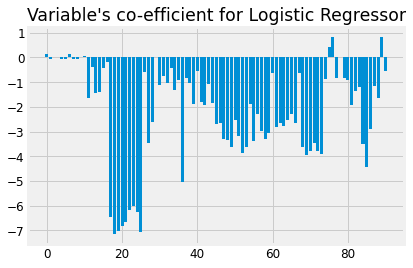

In [197]:
# get importance
importance = bestlogistic_estimator.coef_

# summarize feature importance
for i,v in enumerate(importance[0]):
    feature = X_train.columns[i]
    print('Feature',i, "Score:",v)
        
# plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.title("Variable's co-efficient for Logistic Regressor")
plt.show()

In [198]:
imp = pd.DataFrame({'variables':X_train.columns, 'importance':abs(bestlogistic_estimator.coef_[0])})
imp = imp.sort_values(by='importance',ascending=False)
imp.head(15)

,variables,importance
18,age_[20-30),7.169067
25,age_[90-100),7.064881
19,age_[30-40),7.034912
20,age_[40-50),6.844829
21,age_[50-60),6.656545
17,age_[10-20),6.446857
24,age_[80-90),6.247035
22,age_[60-70),6.176261
23,age_[70-80),6.031000
36,medical_specialty_pediatrics,5.052926


In [110]:
# Using recursive feature elimination
n = 10
best_lr = LogisticRegression(C=1, solver='lbfgs')
rfe = RFE(best_lr, n_features_to_select=n)
rfe.fit(X_train, Y_train)

RFE(estimator=LogisticRegression(C=1), n_features_to_select=10)

In [111]:
rfe.ranking_

array([64, 68, 75, 74, 65, 67, 66, 69, 73, 76, 71, 30, 61, 31, 32, 57, 77,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 51, 59, 48, 78, 38, 50, 40, 58,
       28, 44,  1, 45, 34, 39, 55, 46, 35, 37, 36, 13, 12, 11, 22, 20, 21,
       16, 14, 52, 33, 54, 79, 10,  8,  9, 70, 19, 18, 17, 25, 24, 23, 53,
        4,  3,  2,  7,  6,  5, 29, 62, 15, 60, 80, 82, 49, 42, 43, 41, 27,
       26, 72, 63, 81, 47, 56])

In [112]:
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 age_[10-20)
1 age_[20-30)
1 age_[30-40)
1 age_[40-50)
1 age_[50-60)
1 age_[60-70)
1 age_[70-80)
1 age_[80-90)
1 age_[90-100)
1 medical_specialty_pediatrics
2 pioglitazone_Up
3 pioglitazone_Steady
4 pioglitazone_No
5 rosiglitazone_Up
6 rosiglitazone_Steady
7 rosiglitazone_No
8 glimepiride_Steady
9 glimepiride_Up
10 glimepiride_No
11 metformin_Up
12 metformin_Steady
13 metformin_No
14 nateglinide_Steady
15 miglitol_No
16 nateglinide_No
17 glipizide_Up
18 glipizide_Steady
19 glipizide_No
20 repaglinide_Steady
21 repaglinide_Up
22 repaglinide_No
23 glyburide_Up
24 glyburide_Steady
25 glyburide_No
26 glyburide-metformin_Steady
27 glyburide-metformin_No
28 medical_specialty_neurology
29 acarbose_Steady
30 race_Asian
31 race_Hispanic
32 race_Other
33 chlorpropamide_No
34 medical_specialty_surgery
35 A1Cresult_>8
36 A1Cresult_Norm
37 A1Cresult_None
38 admission_source_id_Other
39 max_glu_serum_>300
40 medical_specialty_low_freq
41 insulin_Up
42 insulin_No
43 insulin_Steady
44 medical_special

In [113]:
top_features = []
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    if x<45:
        top_features.append(y)
print("Top 45 Features:\n")
top_features

Top 45 Features:



['age_[10-20)',
 'age_[20-30)',
 'age_[30-40)',
 'age_[40-50)',
 'age_[50-60)',
 'age_[60-70)',
 'age_[70-80)',
 'age_[80-90)',
 'age_[90-100)',
 'medical_specialty_pediatrics',
 'pioglitazone_Up',
 'pioglitazone_Steady',
 'pioglitazone_No',
 'rosiglitazone_Up',
 'rosiglitazone_Steady',
 'rosiglitazone_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'glimepiride_No',
 'metformin_Up',
 'metformin_Steady',
 'metformin_No',
 'nateglinide_Steady',
 'miglitol_No',
 'nateglinide_No',
 'glipizide_Up',
 'glipizide_Steady',
 'glipizide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'repaglinide_No',
 'glyburide_Up',
 'glyburide_Steady',
 'glyburide_No',
 'glyburide-metformin_Steady',
 'glyburide-metformin_No',
 'medical_specialty_neurology',
 'acarbose_Steady',
 'race_Asian',
 'race_Hispanic',
 'race_Other',
 'chlorpropamide_No',
 'medical_specialty_surgery',
 'A1Cresult_>8',
 'A1Cresult_Norm',
 'A1Cresult_None',
 'admission_source_id_Other',
 'max_glu_serum_>300',
 'medical_specialty_low_freq

In [114]:
# Both methods give the same top_features hence the selcted ones are reliable

In [199]:
X_train_fs = X_train[top_features]
X_test_fs = X_test[top_features]

In [200]:
## Logistic Regressor using Top 45 Features:

In [201]:
start_time = time.time()
param_grid = {'solver':['newton-cg', 'lbfgs'],
              'C': [0.5,1,5],
             'penalty':['l1', 'l2', 'elasticnet']}
LogReg = LogisticRegression(max_iter = 1000)

#using gridsearchcv with cross validation=5
LogReg_1 = GridSearchCV(LogReg, param_grid, cv = 5, scoring = 'roc_auc', refit = True, verbose = 3)
# Fitting the model
LogReg_1.fit(X_train_fs, Y_train)
#Finding the best estimator
print('\nThe best parameters: ', LogReg_1.best_params_)

#best estimator
bestlogistic_estimator = LogReg_1.best_estimator_

#Finding the f1 of best model
best_logistic_model = bestlogistic_estimator.fit(X_train_fs,Y_train)
best_logistic_ypred = best_logistic_model.predict(X_test_fs)
best_logistic_roc = metrics.roc_auc_score(Y_test,best_logistic_ypred)
print('\nROC AUC of the model after hyperparameter tuning is:  %.4f' % (best_logistic_roc*100))
end_time = time.time()
total_time_after = end_time-start_time
print("\nExcecution time: ",total_time_after)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, penalty=l2, solver=newton-cg;, score=0.889 total time=   1.4s
[CV 2/5] END C=0.5, penalty=l2, solver=newton-c

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      9373
           1       0.90      0.70      0.79      7810

    accuracy                           0.83     17183
   macro avg       0.85      0.82      0.82     17183
weighted avg       0.84      0.83      0.83     17183

ROC AUC Score after hyperparameter tuning (Top 45 Features): 0.8187828034129143


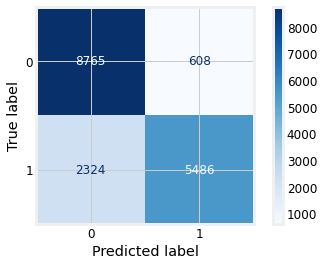

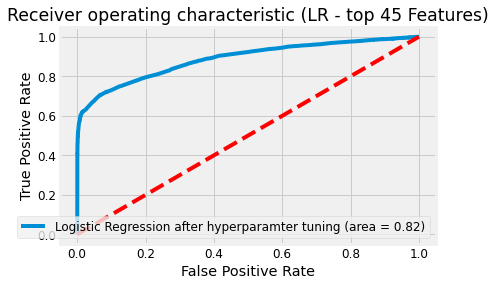

In [202]:
#Model assesment metrics for Logistic Regression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#Calculating precision, Recall and, F1-Score
y_pred_log = bestlogistic_estimator.predict(X_test_fs)
print(classification_report(Y_test, y_pred_log))
#confusion_matrix for the testing
disp = plot_confusion_matrix(bestlogistic_estimator, X_test_fs, Y_test ,display_labels=None, cmap=plt.cm.Blues)
#plotting the ROC curve

nb_roc_auc_log = roc_auc_score(Y_test, bestlogistic_estimator.predict(X_test_fs))
fpr, tpr, thresholds = roc_curve(Y_test, bestlogistic_estimator.predict_proba(X_test_fs)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression after hyperparamter tuning (area = %0.2f)' % nb_roc_auc_log)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (LR - top 45 Features)')
plt.legend(loc="lower right")
plt.savefig('RF_ROC_logistic')
print("ROC AUC Score after hyperparameter tuning (Top 45 Features):", roc_auc_score(Y_test,y_pred_log))
plt.show()

In [203]:
#Getting time difference before and after feature selection
print("Execution time of GridsearchCV (LR model) before Feature selection: ", round(total_time_before,3), "(s)")
print("Execution time of GridsearchCV (LR model) after Feature selection: ", round(total_time_after,3), "(s)")

Execution time of GridsearchCV (LR model) before Feature selection:  148.479 (s)
Execution time of GridsearchCV (LR model) after Feature selection:  68.53 (s)


In [120]:
# We can observe that with the top 45 features our model's ROC AUC score has reduced by nearly 2%
# But, our execution time has also reduced by nearly 50%, so if computational time was a constrain we can opt for this.

### Random Forest Classifier

In [204]:
rf = RandomForestClassifier(random_state=10)
rf_model = rf.fit(X_train, Y_train)
ypred_rf = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      9373
           1       0.99      0.90      0.94      7810

    accuracy                           0.95     17183
   macro avg       0.96      0.95      0.95     17183
weighted avg       0.95      0.95      0.95     17183

Confusion Matrix for training data:


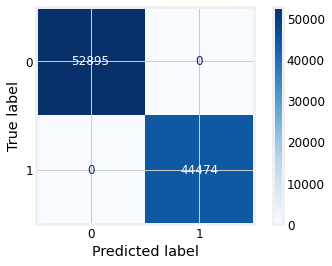

Confusion Matrix for test data:


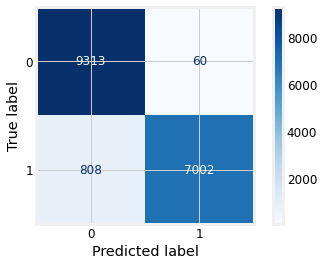

In [205]:
#confusion_matrix for the training data
c_XtrainRF = plot_confusion_matrix(rf_model, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)
print(classification_report(Y_test, ypred_rf))
print("Confusion Matrix for training data:")
plt.show()
#confusion_matrix for the test data
print("Confusion Matrix for test data:")
c_XtestRF = plot_confusion_matrix(rf_model, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

ROC AUC Score before tuning (RF Model): 0.9450707640506628


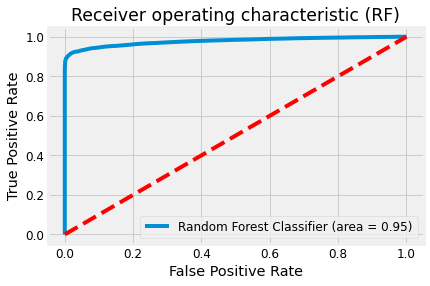

In [206]:
rf_roc_auc = roc_auc_score(Y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (RF)')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
print("ROC AUC Score before tuning (RF Model):",rf_roc_auc)
plt.show()

In [207]:
param_grid = {'n_estimators': [100,200],
             'criterion': ['gini','entropy'],
             #'max_depth': [5,10],
             #'max_features': ["sqrt", "log2"]
             #'min_samples_split':[2,6],
             #'min_samples_leaf':[1,3],
             }
rf = RandomForestClassifier(n_jobs=1,random_state=10)

#using gridsearchcv with cross validation=5
rf_grid = GridSearchCV(rf, param_grid, cv = 5, scoring = 'f1', refit = True, verbose = 3)
# Fitting the model
rf_grid.fit(X_train, Y_train)

#Finding the best parameters
print('\nThe best parameters: ', rf_grid.best_params_)

#best estimator
best_rf_estimator = rf_grid.best_estimator_

#Finding the f1 of best model
best_rf_model = best_rf_estimator.fit(X_train,Y_train)
best_rf_ypred = best_rf_model.predict(X_test)
best_rf_roc = metrics.roc_auc_score(Y_test,best_rf_ypred)
print('\nROC AUC of the model after hyperparameter tuning is:  %.4f' % (best_rf_roc*100))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.938 total time=  13.2s
[CV 2/5] END ..criterion=gini, n_estimators=100;, score=0.940 total time=  13.4s
[CV 3/5] END ..criterion=gini, n_estimators=100;, score=0.938 total time=  14.0s
[CV 4/5] END ..criterion=gini, n_estimators=100;, score=0.939 total time=  14.3s
[CV 5/5] END ..criterion=gini, n_estimators=100;, score=0.936 total time=  13.5s
[CV 1/5] END ..criterion=gini, n_estimators=200;, score=0.939 total time=  27.2s
[CV 2/5] END ..criterion=gini, n_estimators=200;, score=0.943 total time=  24.7s
[CV 3/5] END ..criterion=gini, n_estimators=200;, score=0.940 total time=  24.8s
[CV 4/5] END ..criterion=gini, n_estimators=200;, score=0.940 total time=  24.8s
[CV 5/5] END ..criterion=gini, n_estimators=200;, score=0.938 total time=  24.9s
[CV 1/5] END criterion=entropy, n_estimators=100;, score=0.938 total time=  14.4s
[CV 2/5] END criterion=entropy, n_estimators=100

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      9373
           1       0.99      0.90      0.94      7810

    accuracy                           0.95     17183
   macro avg       0.96      0.95      0.95     17183
weighted avg       0.95      0.95      0.95     17183

ROC AUC Score after hyperparameter tuning (Best RF): 0.9469166482362161


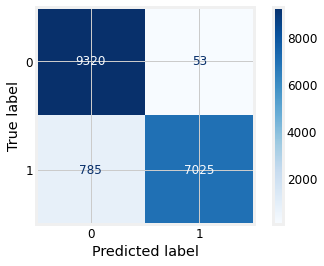

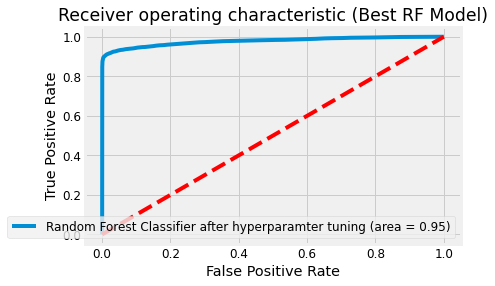

In [208]:
#Calculating precision, Recall and, F1-Score
y_pred_rf = best_rf_estimator.predict(X_test)
print(classification_report(Y_test, y_pred_rf))
#confusion_matrix for the testing
disp = plot_confusion_matrix(best_rf_estimator, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)
#plotting the ROC curve

nb_roc_auc_rf = roc_auc_score(Y_test, best_rf_estimator.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, best_rf_estimator.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier after hyperparamter tuning (area = %0.2f)' % nb_roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Best RF Model)')
plt.legend(loc="lower right")
plt.savefig('RF_ROC_logistic')
print("ROC AUC Score after hyperparameter tuning (Best RF):", roc_auc_score(Y_test,y_pred_rf))
plt.show()

In [247]:
roc_rf = []
estimators=[1,10,15,20,30,50,100,200,300]
for i in estimators:
    rf_es = RandomForestClassifier(random_state=10,n_estimators=i)
    rf_model_es = rf_es.fit(X_train, Y_train)
    ypred_rf_es = rf_model_es.predict(X_test)
    roc_rf.append(metrics.roc_auc_score(Y_test,ypred_rf_es))

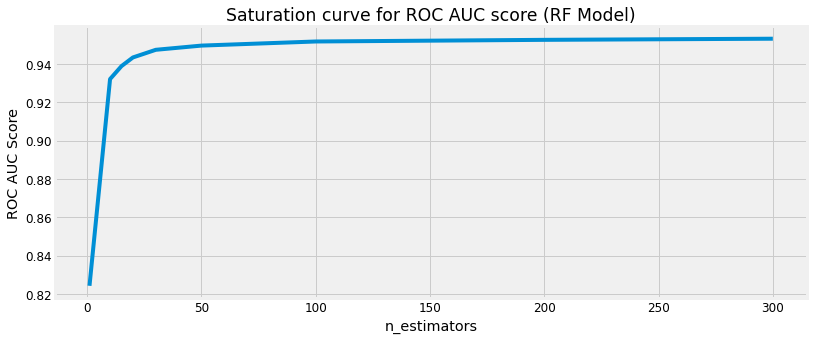

In [287]:
plt.figure(figsize=(12,5))
sns.lineplot(x=estimators, y=roc_rf)
plt.title("Saturation curve for ROC AUC score (RF Model)")
plt.xlabel("n_estimators")
plt.ylabel("ROC AUC Score")
plt.show()

In [296]:
# Regularization Of Random Forest Model

param_grid = { 'max_depth':[5,10,15],
             #'n_estimators': [100,200],
             #'criterion': ['gini','entropy'],
             #'max_depth': [5,10],
             #'max_features': ["sqrt", "log2"]
             #'min_samples_split':[2,6],
             #'min_samples_leaf':[1,3],
             }
rf_reg = RandomForestClassifier(n_jobs=1,random_state=10)

#using gridsearchcv with cross validation=5
rf_reg_grid = GridSearchCV(rf_reg, param_grid, cv = 5, scoring = 'roc_auc', refit = True, verbose = 3)
# Fitting the model
rf_reg_grid.fit(X_train, Y_train)

#Finding the best parameters
print('\nThe best parameters (Regularized RF): ', rf_reg_grid.best_params_)

#best estimator
best_rf_reg_estimator = rf_reg_grid.best_estimator_

#Finding the f1 of best model
best_rf_reg_model = best_rf_reg_estimator.fit(X_train,Y_train)
best_rf_reg_ypred = best_rf_reg_model.predict(X_test)
best_rf_reg_roc = metrics.roc_auc_score(Y_test,best_rf_reg_ypred)
print('\nROC AUC of the tuned RF model after Regularization:  %.4f' % (best_rf_reg_roc*100))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .......................max_depth=5;, score=0.816 total time=   2.5s
[CV 2/5] END .......................max_depth=5;, score=0.818 total time=   2.7s
[CV 3/5] END .......................max_depth=5;, score=0.810 total time=   2.7s
[CV 4/5] END .......................max_depth=5;, score=0.810 total time=   2.6s
[CV 5/5] END .......................max_depth=5;, score=0.822 total time=   2.8s
[CV 1/5] END ......................max_depth=10;, score=0.893 total time=   4.9s
[CV 2/5] END ......................max_depth=10;, score=0.895 total time=   4.7s
[CV 3/5] END ......................max_depth=10;, score=0.885 total time=   4.7s
[CV 4/5] END ......................max_depth=10;, score=0.885 total time=   4.8s
[CV 5/5] END ......................max_depth=10;, score=0.895 total time=   4.7s
[CV 1/5] END ......................max_depth=15;, score=0.941 total time=   7.1s
[CV 2/5] END ......................max_depth=15;,

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     18697
           1       0.87      0.89      0.88     18664

    accuracy                           0.88     37361
   macro avg       0.88      0.88      0.88     37361
weighted avg       0.88      0.88      0.88     37361

ROC AUC Score after Regularization (Best RF): 0.8785174537422552


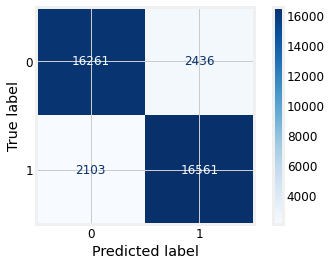

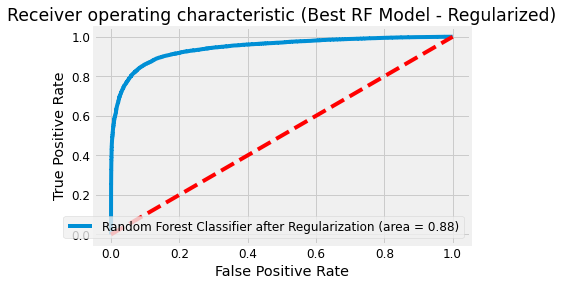

In [298]:
#Calculating precision, Recall and, F1-Score
y_pred_rf_reg = best_rf_reg_estimator.predict(X_test)
print(classification_report(Y_test, y_pred_rf_reg))
#confusion_matrix for the testing
disp = plot_confusion_matrix(best_rf_reg_estimator, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)
#plotting the ROC curve

nb_roc_auc_rf_reg = roc_auc_score(Y_test, best_rf_reg_estimator.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, best_rf_reg_estimator.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier after Regularization (area = %0.2f)' % nb_roc_auc_rf_reg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Best RF Model - Regularized)')
plt.legend(loc="lower right")
plt.savefig('RF_ROC_logistic')
print("ROC AUC Score after Regularization (Best RF):", nb_roc_auc_rf_reg)
plt.show()

In [374]:
#getting feature importance for RF model

imp_rf = pd.DataFrame({'variables':X_train.columns, 'importance':best_rf_reg_estimator.feature_importances_})
imp_rf = imp_rf.sort_values(by='importance',ascending=False)
imp_rf.head(20)

,variables,importance
0,time_in_hospital,0.103345
6,number_inpatient,0.069588
10,number_diagnoses,0.067887
9,diag_3,0.054468
3,num_medications,0.049532
21,age_[50-60),0.049017
20,age_[40-50),0.036606
8,diag_2,0.035979
7,diag_1,0.035741
15,gender_Male,0.032689


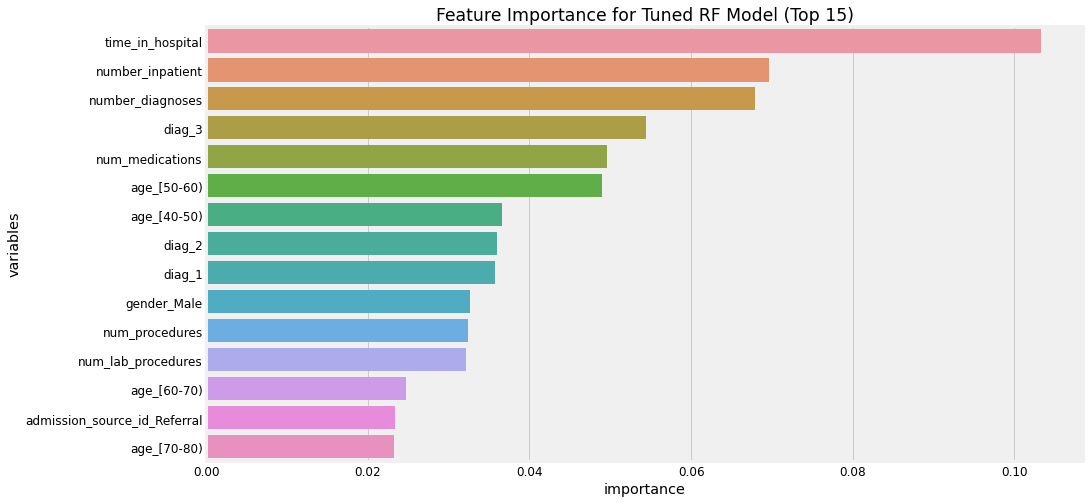

In [376]:
plt.figure(figsize=(14,8))
sns.barplot(y=imp_rf.head(15).variables, x=imp_rf.head(15).importance)
plt.title("Feature Importance for Tuned RF Model (Top 15)")
plt.show()

### Support Vector Machine (SVM)

In [299]:
from sklearn.svm import LinearSVC

In [306]:
# We'll use LinearSVC since thats much faster than SVC
svm = LinearSVC()
svm_model = svm.fit(X_train,Y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_svm_train = svm_model.predict(X_train)

In [307]:
#svm_model = svm.SVC(kernel='linear', probability=True)
# fitting the model
#svm_model.fit(X_train_fs, Y_train)
#svm_pred_test = svm_model.predict(X_test_fs)
#svm_pred_train = svm_model.predict(X_train_fs)

svm_train_acc = accuracy_score(Y_train, y_pred_svm_train)
svm_test_acc = accuracy_score(Y_test, y_pred_svm)
svm_test_err = 1 - svm_test_acc
svm_train_err = 1 - svm_train_acc

SVM Performance:

Training Accuracy is: 0.8384628620590766
Training error is: 0.1615371379409234

Test Accuracy is: 0.8351221862369851
Test error is: 0.1648778137630149

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85     18697
           1       0.91      0.75      0.82     18664

    accuracy                           0.84     37361
   macro avg       0.85      0.84      0.83     37361
weighted avg       0.85      0.84      0.83     37361


Confusion Matrix SVM (Training data):


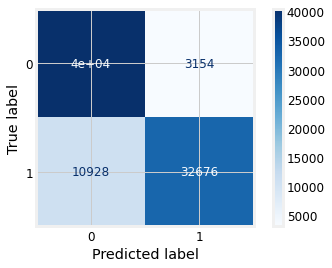


Confusion Matrix SVM (Test data):


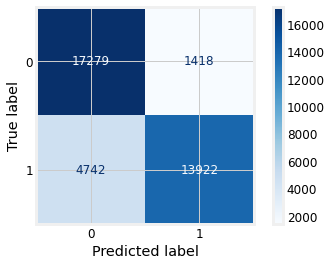

In [309]:
print('SVM Performance:')
print('\nTraining Accuracy is:', svm_train_acc)
print('Training error is:', svm_train_err)
#confusion_matrix for the training data
c_XtrainLogistic = plot_confusion_matrix(svm_model, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)
print('\nTest Accuracy is:', svm_test_acc)
print('Test error is:',svm_test_err)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_svm))
print('\nConfusion Matrix SVM (Training data):')
plt.show()
#confusion_matrix for the test data
print('\nConfusion Matrix SVM (Test data):')
c_XtestSVM = plot_confusion_matrix(svm_model, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

In [315]:
# Since Linear SVC doesn't have 'predict_proba' we'll use CalibratedClassifierCV

from sklearn.calibration import CalibratedClassifierCV

svm = LinearSVC()
clf = CalibratedClassifierCV(svm) 
clf.fit(X_train, Y_train)
y_proba = clf.predict_proba(X_test)

In [316]:
y_proba

array([[0.01535063, 0.98464937],
       [0.83833689, 0.16166311],
       [0.01669941, 0.98330059],
       ...,
       [0.7288103 , 0.2711897 ],
       [0.00107503, 0.99892497],
       [0.25844974, 0.74155026]])

ROC AUC Score before hyperparameter tuning (SVM):  0.8350434728475297


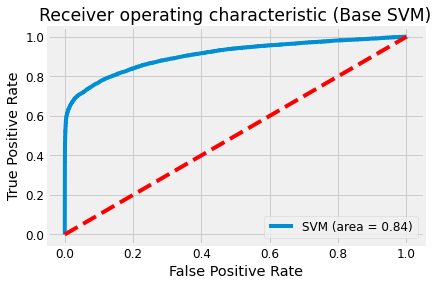

In [318]:
svm_roc_auc = roc_auc_score(Y_test, svm_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, y_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Base SVM)')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
print("ROC AUC Score before hyperparameter tuning (SVM): ",svm_roc_auc)
plt.show()

In [319]:
#Defining the grid search parameters
param_grid = {'penalty': ['l1','l2'],
              'C': [0.5, 1, 10, 100, 500]}
LSVM = LinearSVC()

#using gridsearchcv with cross validation=5
lsvm_grid = GridSearchCV(LSVM, param_grid, cv = 5, scoring = 'roc_auc', refit = True, verbose = 3)
# Fitting the model
lsvm_grid.fit(X_train, Y_train)

#Finding the best estimator
print('The best parameters: ', lsvm_grid.best_params_)

#Accuracy for best estimator
bestSVM_estimator = lsvm_grid.best_estimator_
#Finding the accuracy of the model
ypred_best_svm = bestSVM_estimator.predict(X_test)
best_svm_roc = metrics.roc_auc_score(Y_test, ypred_best_svm)
print('ROC AUC score of LSVM model after tuning Hyperparameters/Regularization is:  %.4f' % (best_svm_roc*100))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=0.5, penalty=l2;, score=0.911 total time=  12.1s
[CV 2/5] END .................C=0.5, penalty=l2;, score=0.913 total time=  14.2s
[CV 3/5] END .................C=0.5, penalty=l2;, score=0.911 total time=  14.9s
[CV 4/5] END .................C=0.5, penalty=l2;, score=0.910 total time=  13.9s
[CV 5/5] END .................C=0.5, penalty=l2;, score=0.910 total time=  12.5s
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l

              precision    recall  f1-score   support

           0       0.78      0.92      0.85     18697
           1       0.91      0.75      0.82     18664

    accuracy                           0.84     37361
   macro avg       0.85      0.84      0.83     37361
weighted avg       0.85      0.84      0.83     37361

ROC AUC Score of SVM model after tuning Hyperparameters & Regularization:  0.8350702623888927


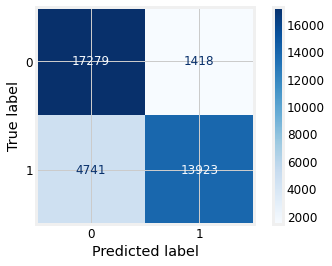

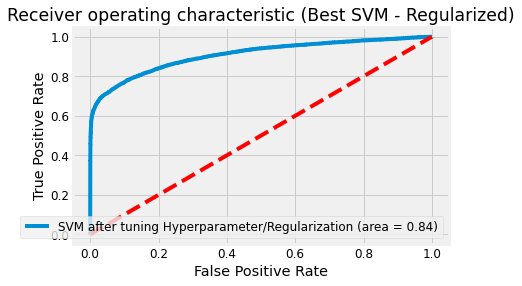

In [325]:
print(classification_report(Y_test, ypred_best_svm))
#confusion_matrix for the testing
disp = plot_confusion_matrix(bestSVM_estimator, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

#getting y_proba
best_svm = LinearSVC(C=1,penalty='l2') #using best parameters
clf = CalibratedClassifierCV(best_svm) 
clf.fit(X_train, Y_train)
y_proba = clf.predict_proba(X_test)

#plotting the ROC curve
nb_roc_auc_svm = roc_auc_score(Y_test, ypred_best_svm)
fpr, tpr, thresholds = roc_curve(Y_test, y_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM after tuning Hyperparameter/Regularization (area = %0.2f)' % nb_roc_auc_svm)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Best SVM - Regularized)')
plt.legend(loc="lower right")
plt.savefig('ROC_SVM_REG')
print("ROC AUC Score of SVM model after tuning Hyperparameters & Regularization: ",nb_roc_auc_svm)
plt.show()

Feature 0 Score: 0.048484707345383245
Feature 1 Score: -0.02141008697002326
Feature 2 Score: -0.0076066511076130355
Feature 3 Score: 0.01660439310688805
Feature 4 Score: -0.0274767689286971
Feature 5 Score: -0.032533764437452
Feature 6 Score: 0.04692815693842855
Feature 7 Score: -0.019455531311488222
Feature 8 Score: -0.016570295671538456
Feature 9 Score: 0.0082164094204649
Feature 10 Score: 0.019261971087766384
Feature 11 Score: -0.5322741697812451
Feature 12 Score: -0.16882008945881866
Feature 13 Score: -0.5388243309341787
Feature 14 Score: -0.5640416373344628
Feature 15 Score: -0.15978991385711633
Feature 16 Score: 0.0
Feature 17 Score: -1.8190294722159777
Feature 18 Score: -2.0086515266918292
Feature 19 Score: -1.9944341004969997
Feature 20 Score: -1.8646924786432704
Feature 21 Score: -1.7943629060107391
Feature 22 Score: -1.6411562856962243
Feature 23 Score: -1.558229638324167
Feature 24 Score: -1.621722962594523
Feature 25 Score: -1.9612893347628209
Feature 26 Score: -0.225577172

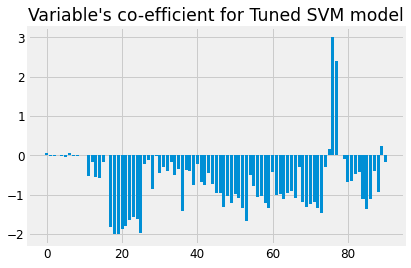

In [340]:
## Getting Most Important features of Selected SVM model

# get importance
importance = bestSVM_estimator.coef_

# summarize feature importance
for i,v in enumerate(importance[0]):
    feature = X_train.columns[i]
    print('Feature',i, "Score:",v)
        
# plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.title("Variable's co-efficient for Tuned SVM model")
plt.show()

In [344]:
imp_svm = pd.DataFrame({'variables':X_train.columns, 'importance':abs(importance[0])})
imp_svm = imp_svm.sort_values(by='importance',ascending=False)
imp_svm.head(15)

,variables,importance
76,miglitol_No,3.012435
77,miglitol_Steady,2.403689
18,age_[20-30),2.008652
19,age_[30-40),1.994434
25,age_[90-100),1.961289
20,age_[40-50),1.864692
17,age_[10-20),1.819029
21,age_[50-60),1.794363
53,nateglinide_Up,1.661674
22,age_[60-70),1.641156


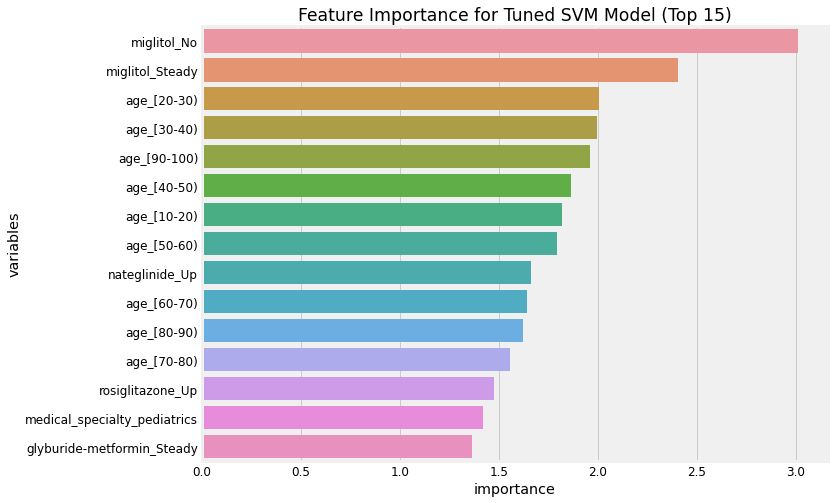

In [415]:
plt.figure(figsize=(10,8))
sns.barplot(y=imp_svm.head(15).variables, x=imp_svm.head(15).importance)
plt.title("Feature Importance for Tuned SVM Model (Top 15)")
plt.show()

## Model Comparision and Conclusion

In [407]:
#Comparing all 4 models side-by-side

#Generating skeleton Dataframe for comparision
models = pd.DataFrame(columns=['Recall','Precision','F1-Score','ROC-AUC','Accuracy'])

st_time = time.time()
best_gnb_estimator.fit(X_train, Y_train)
ypred_gnb = best_gnb_estimator.predict(X_test)    #Best GNB model
gnb_time = time.time()-st_time

st_time = time.time()
bestlogistic_estimator.fit(X_train, Y_train)
ypred_lr = bestlogistic_estimator.predict(X_test) #Best LR model
lr_time = time.time()-st_time

st_time = time.time()
bestSVM_estimator.fit(X_train, Y_train)
ypred_svm = bestSVM_estimator.predict(X_test)     #Best SVM model
svm_time = time.time()-st_time

st_time = time.time()
best_rf_reg_estimator.fit(X_train, Y_train)
ypred_rf = best_rf_reg_estimator.predict(X_test)  #Best RF model
rf_time = time.time()-st_time


predictions = [ypred_gnb, ypred_lr, ypred_svm, ypred_rf]

for i in predictions:
    rec = metrics.recall_score(Y_test,i)
    pre = metrics.precision_score(Y_test,i)
    f1 = metrics.f1_score(Y_test,i)
    roc = metrics.roc_auc_score(Y_test,i)
    acc = metrics.accuracy_score(Y_test,i)
    
    models.loc[len(models.index)] = [rec, pre, f1, roc, acc]
#end of loop    

runtime = pd.DataFrame({'Time(s)':[gnb_time, lr_time, svm_time, rf_time]})

models = pd.concat([models,runtime], axis=1)
models.index = ['Gaussian Naive Bayes', 'Logistic Regression', 'Support Vector Machine', 'Random Forest']

models

,Recall,Precision,F1-Score,ROC-AUC,Accuracy,Time(s)
Gaussian Naive Bayes,0.919096,0.613168,0.735592,0.670143,0.669923,0.202185
Logistic Regression,0.761412,0.894561,0.822634,0.835913,0.835979,8.193740
Support Vector Machine,0.745928,0.907562,0.818845,0.835043,0.835122,16.397628
Random Forest,0.887323,0.871769,0.879477,0.878517,0.878510,8.845504


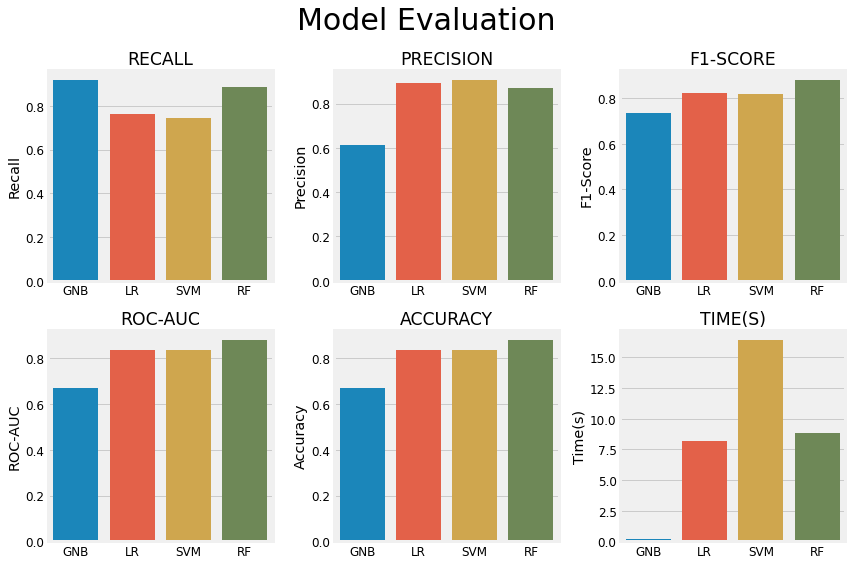

In [441]:
#cols = ['gender','admission_type_id','discharge_disposition_id','admission_source_id','diabetesMed','insulin']

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Model Evaluation',fontsize=30, fontweight=20)

# loop through the length of columns and keep track of index
for n, col in enumerate(models.columns):
    # add a new subplot iteratively
    ax = plt.subplot(2, 3, n+1)

    # plot of numeric vs target
    sns.barplot(y=models[col], x=['GNB','LR','SVM','RF'])
    
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")
    #plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [423]:
#Renaming Feature importance columns to concat DF
imp_lr.rename(columns={'variables':'variables_lr','importance':'Importance_LR'}, inplace=True)
imp_rf.rename(columns={'variables':'variables_rf','importance':'Importance_RF'}, inplace=True)
imp_svm.rename(columns={'variables':'variables_svm','importance':'Importance_SVM'}, inplace=True)

In [427]:
imp_lr_series = imp_lr.variables_lr
imp_svm_series = imp_svm.variables_svm
imp_rf_series = imp_rf.variables_rf

In [433]:
top_features = pd.DataFrame({'Top Features (LR)':imp_lr_series.values,
                             'Top Features (SVM)':imp_svm_series.values,
                             'Top Features (RF)':imp_rf_series.values}).head(15)
top_features.index = [i for i in range(1,16)]
top_features

,Top Features (LR),Top Features (SVM),Top Features (RF)
1,age_[20-30),miglitol_No,time_in_hospital
2,age_[30-40),miglitol_Steady,number_inpatient
3,age_[90-100),age_[20-30),number_diagnoses
4,age_[40-50),age_[30-40),diag_3
5,age_[10-20),age_[90-100),num_medications
6,age_[50-60),age_[40-50),age_[50-60)
7,age_[60-70),age_[10-20),age_[40-50)
8,age_[80-90),age_[50-60),diag_2
9,medical_specialty_pediatrics,nateglinide_Up,diag_1
10,age_[70-80),age_[60-70),gender_Male


In [209]:
# Conclusion:
# Out of all the linear models SVM has the best performance. 

# If computational time is a critical factor then we could also go with Naives Bayes, however there’s a significant 
# tradedoff with performance. Another option would be to feature selection and then LR or SVM

# Regularized RF outperforms all other models but again that is to be expected since it’s an ensemble mode

In [ ]:
# --------------------------------------------------- END -------------------------------------------------------------------- #